<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Census Income</b>
 </div>

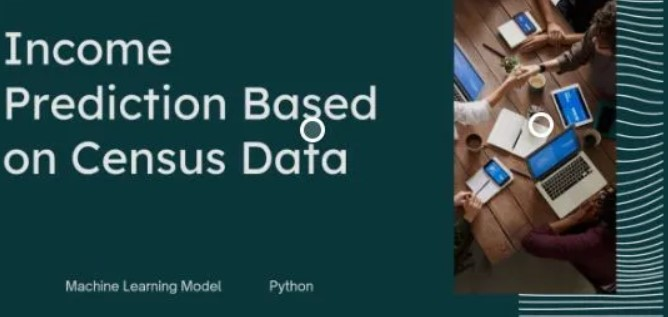

**Project Description**

* This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

**Description of fnlwgt (final weight)**

* The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. * * These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

**1.**	A single cell estimate of the population 16+ for each state.

**2.**	Controls for Hispanic Origin by age and sex.

**3.**	Controls by Race, age and sex.

* We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

**Dataset Link-**

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv



<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Bringing in Vital Libraries</b>
 </div>

In [127]:

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
# Magic command to display plots in Jupyter Notebook
%matplotlib inline
import seaborn as sns

# Missing data visualization
import missingno as msno  # For visualizing missing data patterns

# Statistical functions
from scipy.stats import zscore  # For calculating z-scores

# Data preprocessing
from sklearn.preprocessing import PowerTransformer, StandardScaler  # For data transformation and scaling


# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For detecting multicollinearity

# Data splitting and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score  # For data splitting and model evaluation
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, precision_recall_fscore_support
) # For model evaluation metrics

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier # Ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


# Data preprocessing and encoding
from sklearn.preprocessing import LabelEncoder  # For label encoding

# Imbalanced data handling
from imblearn import under_sampling, over_sampling  # For handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # For oversampling

# Model serialization
import pickle  # For model serialization

# Copying and warnings
import copy  # For copying objects
import warnings  # For handling warnings and suppressing them
warnings.filterwarnings('ignore')  # Suppressing warnings

import joblib

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Fetching the Dataset</b>
 </div>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [3]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

In [5]:
df.sample()

Age Workclass  Fnlwgt Education  Education_num       Marital_status  \
30922   26   Private  247025   HS-grad              9   Married-civ-spouse   

              Occupation Relationship    Race    Sex  Capital_gain  \
30922   Transport-moving      Husband   White   Male             0   

       Capital_loss  Hours_per_week  Native_country  Income  
30922             0              65   United-States   <=50K

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">A Comprehensive Analysis of the Dataset</b>
 </div>

**Features/Attribute/Independent Variables:**

**1.	Age:** This column records the age of the individual.

**2.	Workclass:** It indicates the type of employment or work class of the individual, such as private, self-employed, government, etc.

**3.	Fnlwgt:** This is the final weight of the person. It is used as a sampling weight in the survey and may not be relevant for analysis.

**4.	Education:** It represents the highest level of education achieved by the individual, such as high school, bachelor's degree, etc.

**5.	Education_num:** This is a numerical representation of the education level, often corresponding to the number of years of education.

**6.	Marital_status:** It indicates the marital status of the individual, such as married, divorced, single, etc.

**7.	Occupation:** This column specifies the occupation or job type of the person, like doctor, engineer, or other professions.

**8.	Relationship:** It describes the relationship status of the individual within their household, such as husband, wife, or other family roles.

**9.	Race:** It records the racial background of the individual, such as White, Black, Asian, etc.

**10.	Sex:** This column specifies the gender of the individual, typically as 'Male' or 'Female'.

**11.	Capital_gain:** It represents the financial gains an individual has made through investments or capital assets.

**12.	Capital_loss:** This column records the financial losses incurred by the individual through investments or capital assets.

**13.	Hours_per_week:** It indicates the number of hours the individual works per week.

**14.	Native_country:** This column represents the native country of the individual.

**Label/Target/Dependent Variables:**

**15.	Income:** This is the target variable, indicating whether the individual's income is above or below a certain threshold, often denoted as ">50K" for income above the threshold and "<=50K" for income below it.

**These columns collectively provide information about individuals and their attributes, which can be used to analyze and predict income levels based on various factors.**

**Observation From Dataset:**

> * In this census dataset, there are a total of **15 columns**. Among these, **14 columns serve as independent variables** and encompass the following features: 'Age,' 'Workclass,' 'Fnlwgt,' 'Education,' 'Education_num,' 'Marital_status,' 'Occupation,' 'Relationship,' 'Race,' 'Sex,' 'Capital_gain,' 'Capital_loss,' 'Hours_per_week,' and 'Native_country.'

> * **The objective is to predict whether an individual's income exceeds 50K or is equal to or less than 50K. Therefore, this problem is categorized as binary classification.**

> * It is worth noting that the dataset includes a diverse mix of categorical and numerical variables, along with **missing values denoted as '?'** in some cases.



<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Exploratory Data Analysis (EDA)</b>
 </div>

In [6]:
df.shape

(32560, 15)

In [7]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 32560 rows and 15 columns.


In [8]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [9]:
print(f"Data Types of DataFrame Columns:\n {df.dtypes}")

Data Types of DataFrame Columns:
 Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


In [10]:
type_groups = df.columns.to_series().groupby(df.dtypes).groups
type_counts = df.dtypes.value_counts()

for dtype, columns in type_groups.items():
    capitalized_dtype = str(dtype).upper()
    print(f"\033[1mData Type:\033[0m {capitalized_dtype}, \033[1mCount:\033[0m {type_counts[dtype]}")
    for column in columns:
        print(f"  - {column}")

Data Type: INT64, Count: 6
  - Age
  - Fnlwgt
  - Education_num
  - Capital_gain
  - Capital_loss
  - Hours_per_week
Data Type: OBJECT, Count: 9
  - Workclass
  - Education
  - Marital_status
  - Occupation
  - Relationship
  - Race
  - Sex
  - Native_country
  - Income


**The dataset consists of six integer variable (int64)and object variables (object).**

**DataFrame Information Display**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Observations from the DataFrame information:**

> *  The DataFrame contains 32,560 rows and 15 columns, as indicated by the RangeIndex.

> * There are **no missing values** in the dataset, as indicated by the "count" row for each column, all of which show 32,560 non-null entries. This absence of missing values is important for modeling, as it ensures the dataset's completeness.

> * The dataset contains a mix of categorical and numerical columns, with some of the numerical columns exhibiting significant skewness (e.g., 'Capital_gain' and 'Capital_loss') based on the difference between the standard deviation and mean. Skewed data can impact the performance of certain machine learning models, and it may be necessary to apply transformations to address this issue.

> * The 'fnlwgt' column is suggested to be a sampling weight and is considered to plays a crucial role to the target variable 'income.' "fnlwgt" is an important variable in the CPS dataset as it plays a crucial role in adjusting and weighting the data to make it representative of the U.S. population. Its use ensures that the survey results can be generalized to the broader population and are a fundamental aspect of survey methodology.

> * The 'Income' column represents the target variable for a binary classification problem, with two unique values ('<=50K' and '>50K'). This indicates that the goal of the modeling task is to predict an individual's income category.

> **To summarize, the dataset is complete, but some preprocessing steps, such as addressing skewness in numerical columns should be considered to prepare it for modeling. Additionally, the binary nature of the 'Income' column signifies that the modeling task is a binary classification problem.**



### Let's examine the dataset's statistical information:

In [12]:
# For numerical columns exclusively
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

> * There are no missing values in the numerical columns since the count for each column is 32,560.

> * The minimum age of a person with income is 17, the maximum age is 90, and the average age is 38.

> * The "fnlwgt" (final weight) variable from the Current Population Survey (CPS) plays a vital role in ensuring the accurate representation of the entire U.S. population. By accounting for the complex sampling design and demographic characteristics, "fnlwgt" facilitates precise predictions and analyses of income and socio-economic factors applicable to the broader population.

> * The 'Education' column seems to represent the total number of years of education.

> * 'Capital gain' and 'Capital loss' may reflect financial outcomes, such as profit or loss from investments, rather than salary. Both columns exhibit significant skewness, given that the standard deviation is much larger than the mean value. Addressing this skewness is important.

> * 'Hours per week' indicates the amount of time an individual spends working each week, ranging from a minimum of 1 hour to a maximum of 99 hours, with an average of 40 hours. The substantial difference between the minimum and maximum values suggests the need to check for skewness.

> * The values in the dataset are on different scales, so using the StandardScaler from the sklearn library is advisable to standardize the features for modeling.





In [13]:
# For the categorical columns exclusively
df.describe(include=['object'])

Workclass Education       Marital_status       Occupation Relationship  \
count      32560     32560                32560            32560        32560   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          Race    Sex  Native_country  Income  
count    32560  32560           32560   32560  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27815  21789           29169   24719

df
> * The unique values for each categorical column provide insights into the diversity of categories within these columns. This information can be valuable for feature engineering, as it helps identify the different levels or classes that need to be encoded for modeling.

> * The "top" row in each column indicates the most frequent value within that column. Knowing the most common categories can be helpful for understanding the dataset and making decisions regarding imbalanced classes or feature importance.

> * The "freq" row represents the frequency of the most common value, which can provide insights into class distribution. This is especially important when dealing with classification tasks to assess class balance or class imbalance.

> **In summary, the categorical columns are complete with no missing values, and their characteristics provide a foundation for feature engineering and understanding class distribution, which are important considerations for modeling.**

**Based on my investigation thus far, it appears that this dataset is well-organized and fully populated, without any gaps or missing values in its columns. This makes it a suitable choice for analysis and modeling purposes, particularly for predictive modeling tasks related to income classification.**

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Duplicate & Null ValuesValues</b>
 </div>

In [14]:
df.duplicated().sum()

24

In [15]:
duplicates = df[df.duplicated(keep=False)]
duplicates

Age          Workclass  Fnlwgt      Education  Education_num  \
2302    90            Private   52386   Some-college             10   
3916    19            Private  251579   Some-college             10   
4324    25            Private  308144      Bachelors             13   
4766    21            Private  250051   Some-college             10   
4880    25            Private  308144      Bachelors             13   
4939    38            Private  207202        HS-grad              9   
5103    90            Private   52386   Some-college             10   
5578    27            Private  255582        HS-grad              9   
5804    20            Private  107658   Some-college             10   
5841    25            Private  195994        1st-4th              2   
6989    19            Private  138153   Some-college             10   
7052    49   Self-emp-not-inc   43479   Some-college             10   
7919    49            Private   31267        7th-8th              4   
8079    21            Private  243368      Preschool              1   
8678    28            Private  274679        Masters             14   
9170    21            Private  250051   Some-college             10   
10366   42            Private  204235   Some-college             10   
11630   20            Private  107658   Some-college             10   
11964   46            Private  133616   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
15188   19            Private  146679   Some-college             10   
16296   46            Private  173243        HS-grad              9   
16845   35            Private  379959        HS-grad              9   
16974   30            Private  144593        HS-grad              9   
17039   46            Private  173243        HS-grad              9   
17672   19            Private   97261        HS-grad              9   
17915   44            Private  367749      Bachelors             13   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21102   23            Private  240137        5th-6th              3   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366   44            Private  367749      Bachelors             13   
22493   49   Self-emp-not-inc   43479   Some-college             10   
25623   39            Private   30916        HS-grad              9   
25871   23            Private  240137        5th-6th              3   
26312   28            Private  274679        Masters             14   
28229   27            Private  255582        HS-grad              9   
28521   42            Private  204235   Some-college             10   
28845   39            Private   30916        HS-grad              9   
29156   38            Private  207202        HS-grad              9   
30844   46            Private  133616   Some-college             10   
31992   19            Private  251579   Some-college             10   
32403   35            Private  379959        HS-grad              9   

            Marital_status          Occupation    Relationship  \
2302         Never-married       Other-service   Not-in-family   
3916         Never-married       Other-service       Own-child   
4324         Never-married        Craft-repair   Not-in-family   
4766         Never-married      Prof-specialty       Own-child   
4880         Never-married        Craft-repair   Not-in-family   
4939    Married-civ-spouse   Machine-op-inspct         Husband   
5103         Never-married       Other-service   Not-in-family   
5578         Never-married   Machine-op-inspct   Not-in-family   
5804

In [16]:
duplicates = df[df.duplicated(keep=False)]
duplicate_indices = duplicates.index
print("Row numbers with duplicates:")
print(duplicate_indices)

Row numbers with duplicates:
Int64Index([ 2302,  3916,  4324,  4766,  4880,  4939,  5103,  5578,  5804,
             5841,  6989,  7052,  7919,  8079,  8678,  9170, 10366, 11630,
            11964, 13083, 15058, 15188, 16296, 16845, 16974, 17039, 17672,
            17915, 18554, 18697, 21102, 21317, 21489, 21874, 22299, 22366,
            22493, 25623, 25871, 26312, 28229, 28521, 28845, 29156, 30844,
            31992, 32403],
           dtype='int64')


In [17]:
# List of row indices to compare
row_indices = [2302, 3916, 4324, 4766, 4880, 4939, 5103, 5578, 5804,
               5841, 6989, 7052, 7919, 8079, 8678, 9170, 10366, 11630,
               11964, 13083, 15058, 15188, 16296, 16845, 16974, 17039, 17672,
               17915, 18554, 18697, 21102, 21317, 21489, 21874, 22299, 22366,
               22493, 25623, 25871, 26312, 28229, 28521, 28845, 29156, 30844,
               31992, 32403]

matching_pairs = []

# Iterate through the row indices and compare each pair
for i in range(len(row_indices)):
    row1_index = row_indices[i]
    row1 = df.iloc[row1_index]

    for j in range(i+1, len(row_indices)):
        row2_index = row_indices[j]
        row2 = df.iloc[row2_index]

        if row1.equals(row2):
            matching_pairs.append((row1_index, row2_index))

# Print the matching pairs
print("Matching Pairs of Rows:")
for pair in matching_pairs:
    print(f"Row {pair[0]} and Row {pair[1]} have the same data.")

Matching Pairs of Rows:
Row 2302 and Row 5103 have the same data.
Row 3916 and Row 31992 have the same data.
Row 4324 and Row 4880 have the same data.
Row 4766 and Row 9170 have the same data.
Row 4939 and Row 29156 have the same data.
Row 5578 and Row 28229 have the same data.
Row 5804 and Row 11630 have the same data.
Row 5841 and Row 13083 have the same data.
Row 5841 and Row 22299 have the same data.
Row 6989 and Row 21317 have the same data.
Row 7052 and Row 22493 have the same data.
Row 7919 and Row 21874 have the same data.
Row 8079 and Row 15058 have the same data.
Row 8678 and Row 26312 have the same data.
Row 10366 and Row 28521 have the same data.
Row 11964 and Row 30844 have the same data.
Row 13083 and Row 22299 have the same data.
Row 15188 and Row 21489 have the same data.
Row 16296 and Row 17039 have the same data.
Row 16845 and Row 32403 have the same data.
Row 16974 and Row 18554 have the same data.
Row 17672 and Row 18697 have the same data.
Row 17915 and Row 22366 h

### Duplicate the DataFrame into another variable to preserve the original data in the 'df' variable

In [18]:
# Duplicate the DataFrame into another variable to preserve the original data in the 'df' variable
df1 = copy.deepcopy(df)
df1.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [19]:
#'Dropping the second duplicate rows'
df1.drop_duplicates(keep='first', inplace=True)

In [20]:
# duplicated dataframe
df1.shape

(32536, 15)

In [21]:
# Original dataframe
df.shape

(32560, 15)

**In the dataset, it was observed that there were rows where all the data in one row were exactly the same as another row. This situation typically occurs due to multiple entries for the same information. For example, if a person's data was recorded more than once, each entry would be identical.**

**To resolve this issue, a decision was made to remove these redundant duplicate rows from the dataset. The goal was to keep only the first occurrence of the data, as it is typically the original and accurate record. This helps to ensure that the dataset remains clean, with only unique and non-repetitive entries, which is essential for accurate analysis or modeling.**

* Let's examine the presence of null values to gain a clearer understanding of the dataset's data

In [22]:
# Checking the Null Values
df1.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

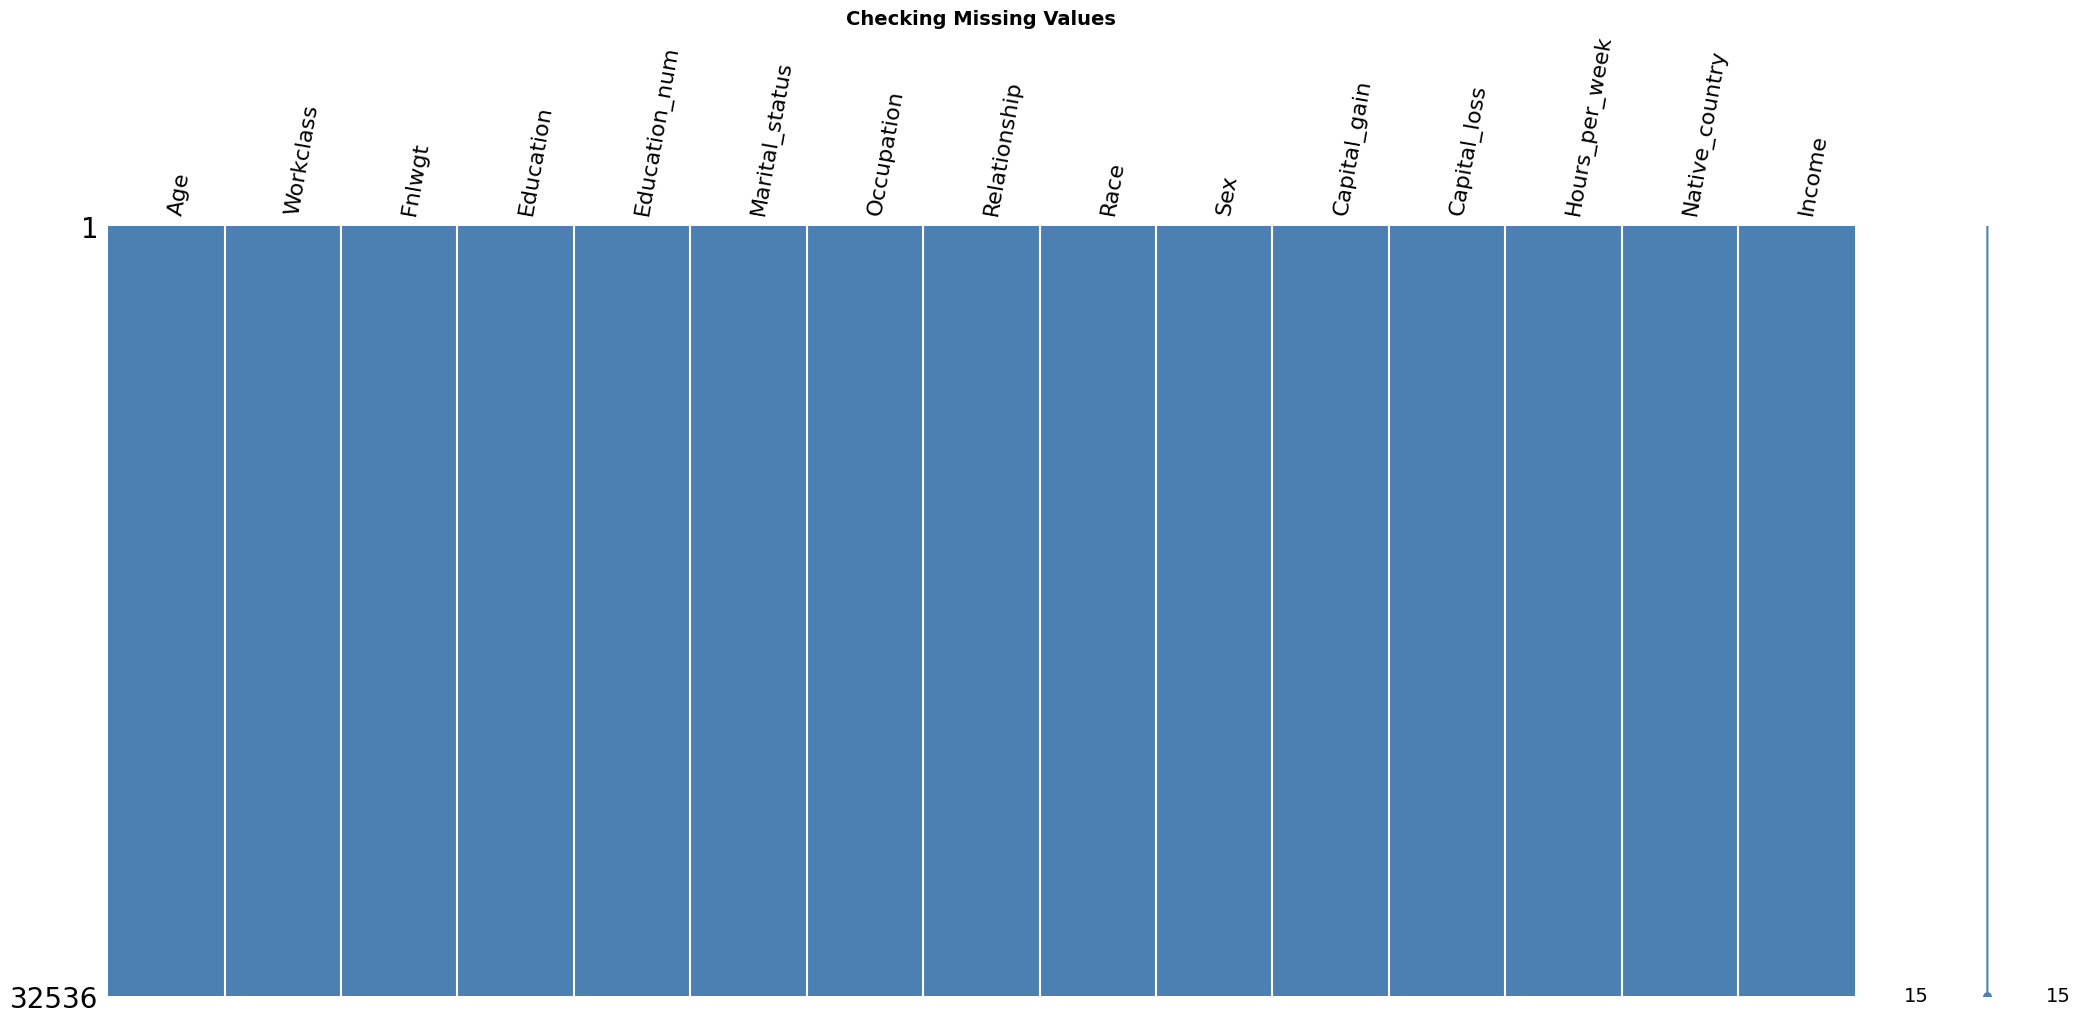

In [23]:
# Visiualizing missing data in DataFrame
msno.matrix(df1, color=( 0.3, 0.5, 0.7))
plt.title('Checking Missing Values', fontsize=14, fontweight='bold')
plt.xticks(rotation=80)
plt.show()

**Based on the data and graphical representation, the dataset appears to be free of missing values.**

### Let's conduct a more detailed examination:-

In [24]:
# Display value counts for each column
for column in df1.columns:
    print(f"\033[1mValue Counts for '{column}':\033[0m")
    print(df1[column].value_counts(),'\n')

Value Counts for 'Age':
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 

Value Counts for 'Workclass':
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

Value Counts for 'Fnlwgt':
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64 

Value Counts for 'Education':
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Do

In [25]:
question_mark_counts = {}

for column in df1.columns:
    count = df1[column].apply(lambda x: str(x).count('?')).sum()
    if count > 0:
        question_mark_counts[column] = count

# for column, count in question_mark_counts.items():
#     print(f"Column '{column}' contains {count} '?'")
total_question_mark_count = sum(question_mark_counts.values())
print(f"Total count of '?' in the dataset: {total_question_mark_count}")
print(f"Count of '?' in the columns: {question_mark_counts}")

Total count of '?' in the dataset: 4261
Count of '?' in the columns: {'Workclass': 1836, 'Occupation': 1843, 'Native_country': 582}


In [26]:
# Replacing the special character '?' with 'NaN'
df1.replace({' ?': np.nan}, inplace=True)

In [27]:
df1.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [28]:
null_percentage = (df1.isnull().sum() / len(df)) * 100

print(null_percentage)

Age               0.000000
Workclass         5.638821
Fnlwgt            0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        5.660319
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    1.787469
Income            0.000000
dtype: float64


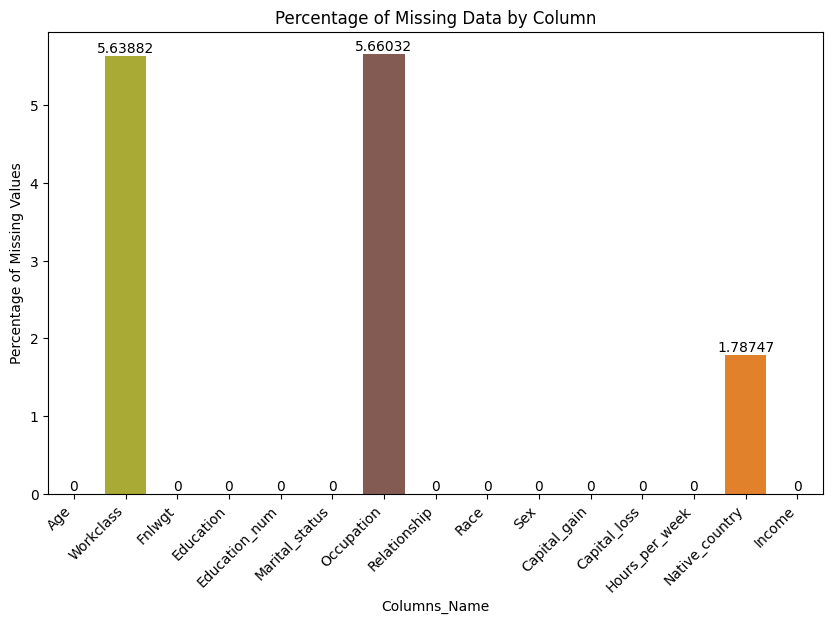

In [29]:
# Create a bar plot to visualize missing data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="tab10_r")
for i in ax.containers:
    ax.bar_label(i)
ax.set(xlabel='Columns_Name', ylabel='Percentage of Missing Values')
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right',rotation=45)
ax.set_title("Percentage of Missing Data by Column")
plt.show()

**As observed, there are three columns in the dataset that contain a special character represented as '?' which are replaced by NaN(Not-a-Number.)**

**The presence of such special characters may indicate missing or unknown data, and addressing them is essential for accurate data analysis and modeling.**

In [30]:
selected_columns = df1[['Workclass', 'Occupation', 'Native_country']]
column_data_types = selected_columns.dtypes
print(column_data_types)

Workclass         object
Occupation        object
Native_country    object
dtype: object


**Since these columns have 'object' data types, the mode technique is used to replace '?' with the most common value, aligning the data with its existing distribution for analysis**

**Data Cleaning and preprocessing**

In [31]:
# Fill with most frequent value: is typically used for categorical (discrete) data, such as strings or categories.
df1["Workclass"] = df1["Workclass"].fillna(df1["Workclass"].mode()[0])
print(df1["Workclass"].mode())

0     Private
Name: Workclass, dtype: object


In [32]:
df1["Occupation"] = df1["Occupation"].fillna(df1["Occupation"].mode()[0])
print(df1["Occupation"].mode())

0     Prof-specialty
Name: Occupation, dtype: object


In [33]:
df1["Native_country"] = df1["Native_country"].fillna(df1["Native_country"].mode()[0])
print(df1["Native_country"].mode())

0     United-States
Name: Native_country, dtype: object


In [34]:
df1.isna().sum().sum()

0

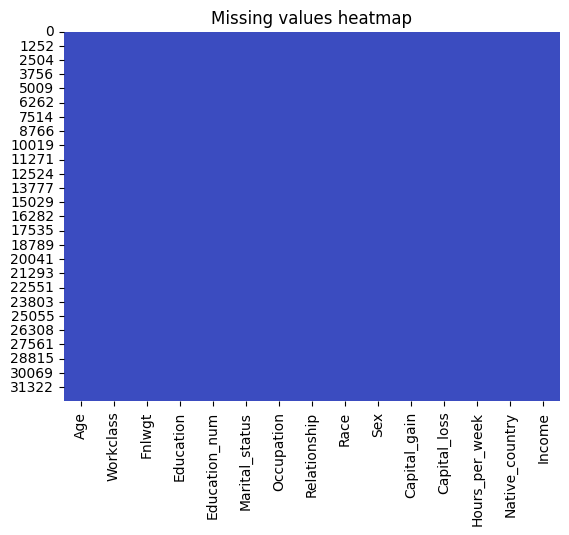

In [35]:
# # Lets visualize it using heatmap
sns.heatmap(df1.isnull(), cmap="coolwarm", cbar = False).set_title("Missing values heatmap")
plt.show()

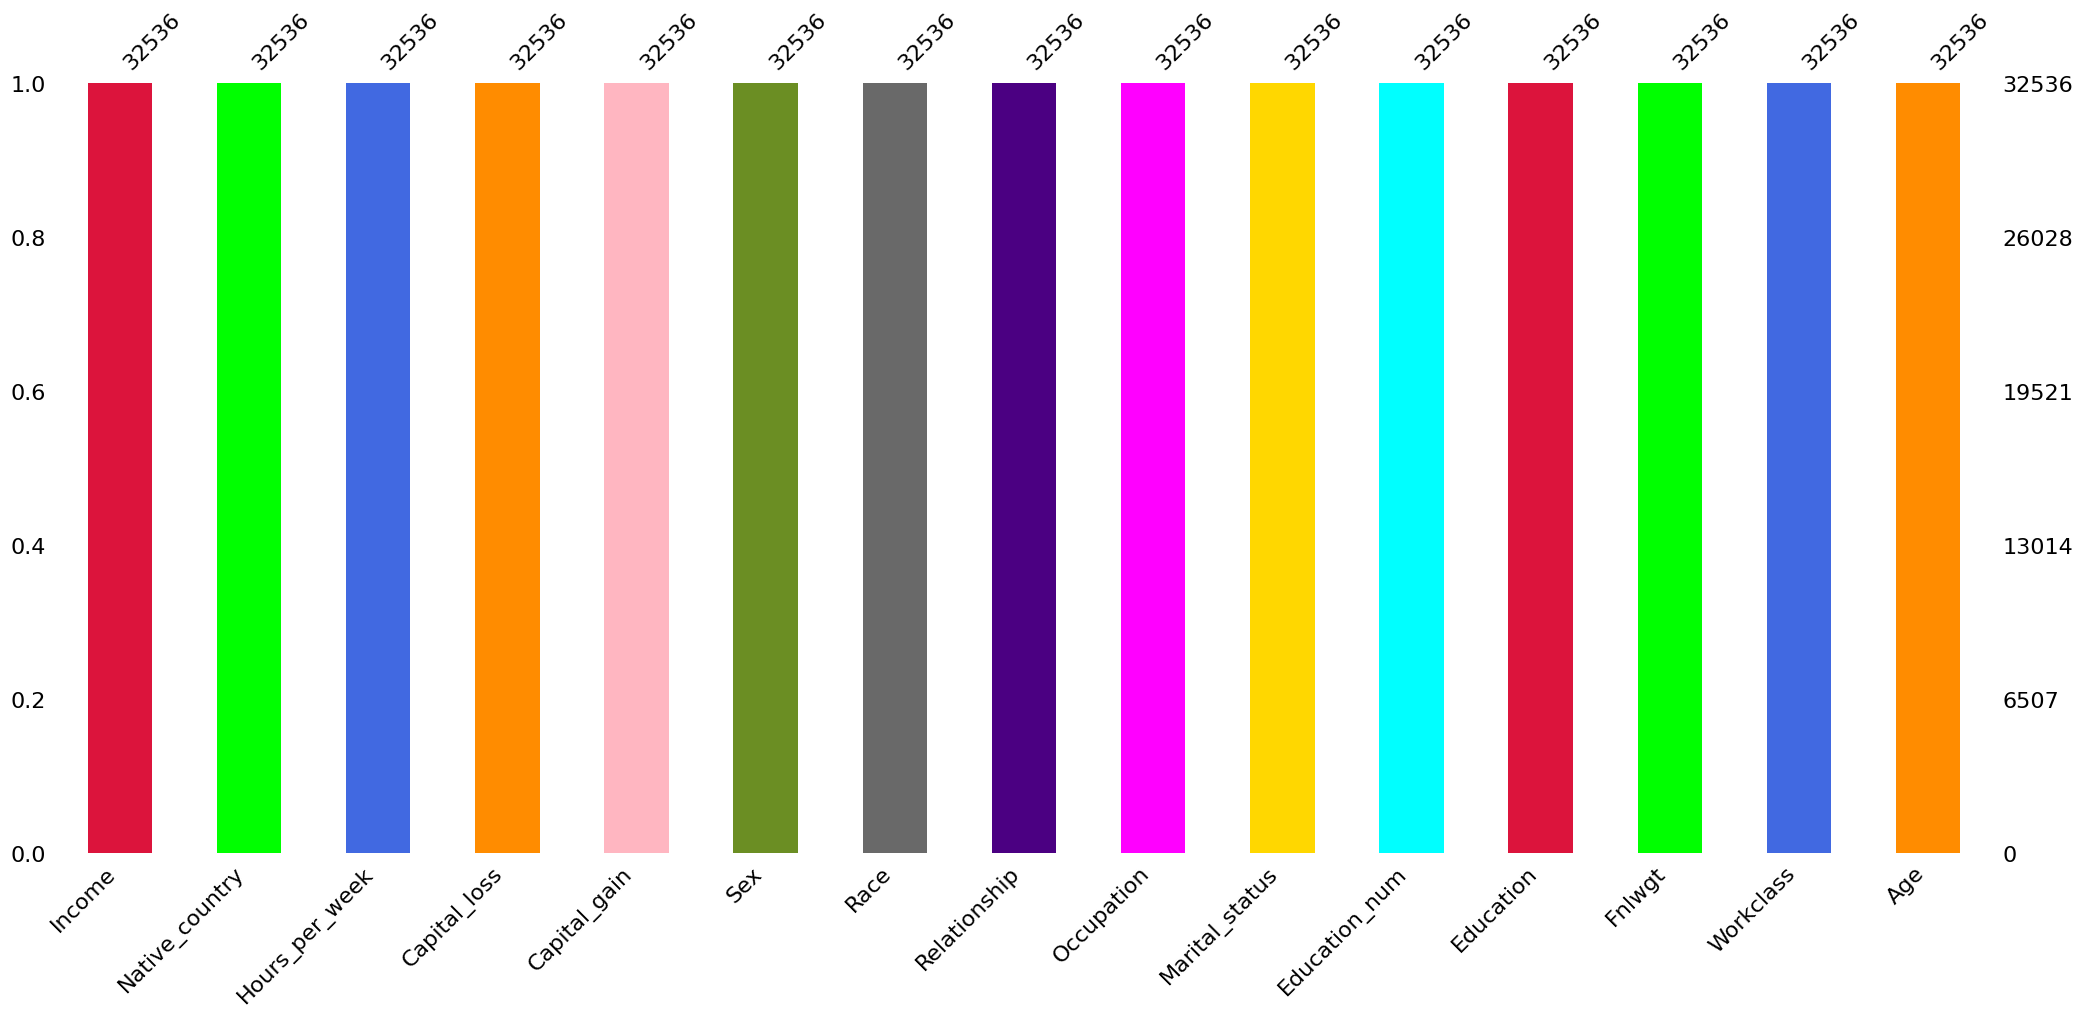

In [36]:
figsize=(8,6)
msno.bar(df1, color=['crimson', 'lime', 'royalblue', 'darkorange', 'lightpink', 'olivedrab', 'dimgray', 'indigo', 'magenta', 'gold', 'aqua'], sort='descending')
plt.show()

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


**After removing duplicates and addressing missing values, it can be concluded from both the data and graphical representations that.**

> * The dataset is represented as a Pandas DataFrame.

> * It contains a total of 32,536 entries (rows).

> * There are 15 columns in the dataset.

> *Each column has non-null values, indicating that there are no missing values in any of the columns.

> * The data types of the columns include integers (int64) and objects (likely representing strings or categorical data).

> * The columns in the dataset include 'Age,' 'Workclass,' 'Fnlwgt,' 'Education,' 'Education_num,' 'Marital_status,' 'Occupation,' 'Relationship,' 'Race,' 'Sex,' 'Capital_gain,' 'Capital_loss,' 'Hours_per_week,' 'Native_country,' and 'Income.'

> **This well-structured dataset with no missing values appears suitable for analysis and modeling tasks, particularly for predictive modeling related to income classification.**

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Assessing dataset's categorical and numerical columns</b>
 </div>

In [38]:
# Checking for categorical columns
categorical_cols = [i for i in df1.dtypes.index if df1.dtypes[i] == "object"]
print("\033[1mLength of Categorical Columns:\033[0m",len(categorical_cols),"\033[1mCategorical Columns:\033[0m", categorical_cols)
print("\n")

# Checking for numerical columns
numerical_cols = [i for i in df1.dtypes.index if df1.dtypes[i] != "object"]
print("\033[1mLength of Numercal Columns:\033[0m",len(numerical_cols), "\033[1mNumerical Columns:\033[0m ", numerical_cols)

Length of Categorical Columns: 9 Categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Length of Numercal Columns: 6 Numerical Columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Data Visualization</b>
 </div>

**Univariant Analysis:-**

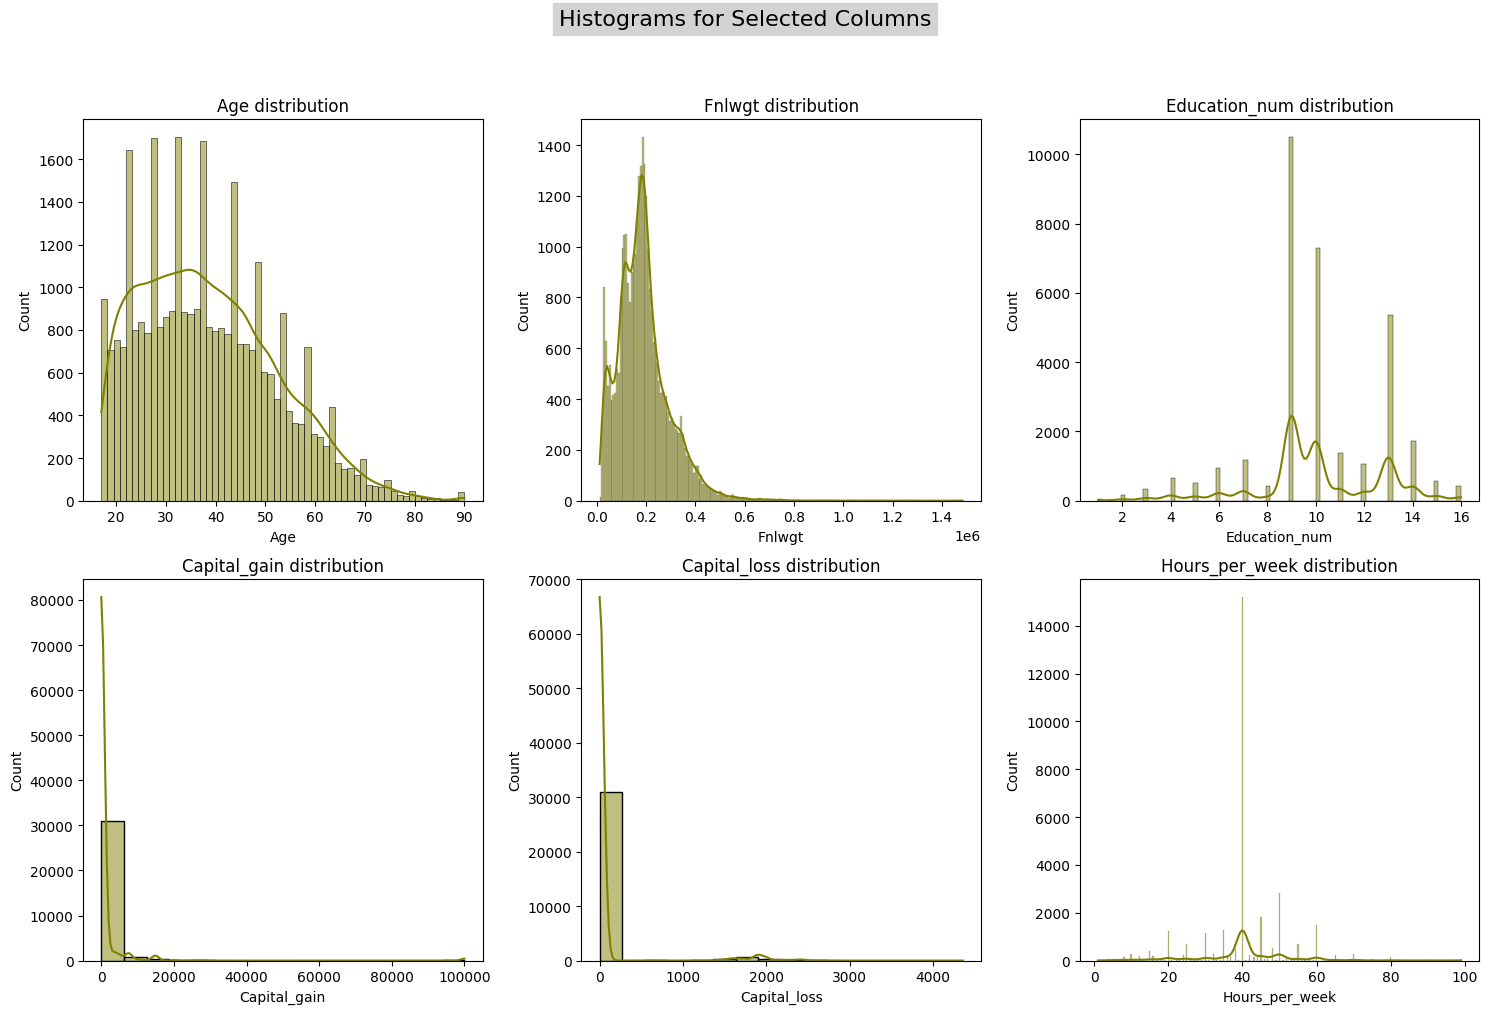

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Histograms for Selected Columns', fontsize=16, backgroundcolor='Lightgray', y= 1.01)

for i, column in enumerate(numerical_cols):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    sns.histplot(data=df1, x=column, ax=ax, kde=True, color='olive')
    ax.set_title(f'{column} distribution', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

* The 'Age' distribution is slightly right-skewed, with a notable difference between the minimum and maximum working ages, suggesting the need for attention.
* In column 'Education_num' indicates a slight leftward skew in the data, with the majority of values concentrated on the right side of the distribution
* Similarly, 'Capital_gain' and 'Capital_loss' exhibit significant right-skewness in their distributions.
* The majority of the population has both **"capital_loss" and "capital_gain"** values equal to 0. Consequently, I plan to remove this column from the dataset due to its predominantly zero values.
* The average weekly working hours, around 40, indicate a somewhat skewed distribution."

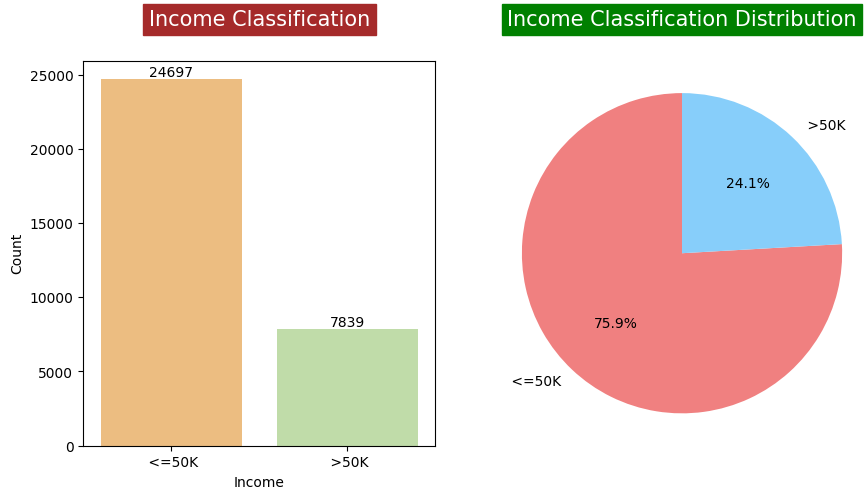

In [40]:
# Count plot for target variable 'Income'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Income", data=df1, palette='Spectral', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Income", ylabel="Count")
ax1.set_title("Income Classification", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

income_counts = df1["Income"].value_counts()
colors = ['lightcoral', 'lightskyblue']
ax2.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Income Classification Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

**As observed, the income data comprises two categories: <=50K and >50K. The count of individuals with income <=50K stands at 24,712, constituting 75.9% of the population, while the count of those with income >50K is 7,841, representing 24.1%. This reveals an imbalance in the target data that requires attention.**

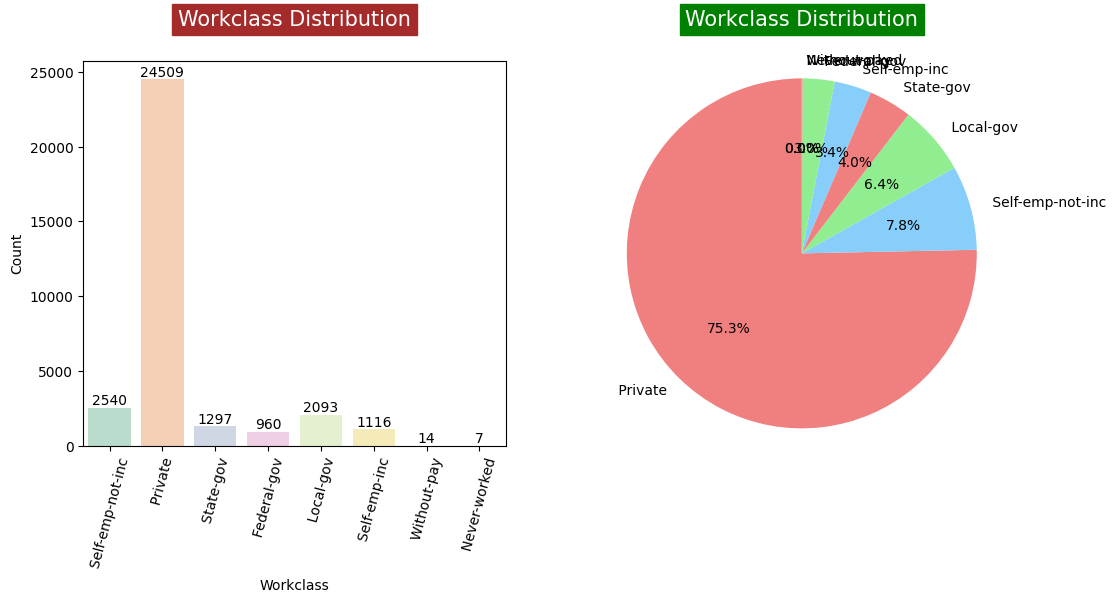

In [41]:
# Count Plot for WorkClass
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Workclass", data=df1, palette='Pastel2', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Workclass", ylabel="Count")
ax1.set_title("Workclass Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

workclass_counts = df1["Workclass"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
ax2.pie(workclass_counts, labels=workclass_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Workclass Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()


In the 'Workclass' data, I observe eight distinct categories. Among these, the 'Private' category is the most prevalent, with a count of 24,509, while the 'Never-Worked' category has the fewest occurrences, with only 7 instances.

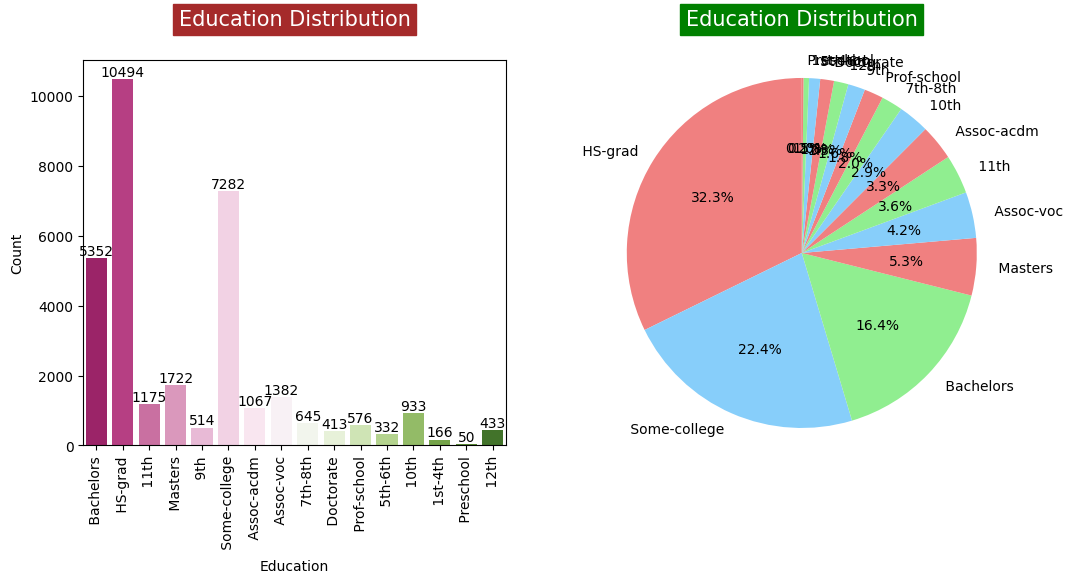

In [42]:
# Count Plot for Education
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Education", data=df1, palette='PiYG', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Education", ylabel="Count")
ax1.set_title("Education Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

education_counts = df1["Education"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
ax2.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Education Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

Within the 'Education' data, I found a total of 16 distinct categories. Notably, individuals with an 'HS-Graduate' level of education are the most numerous, with a count of 10,494, surpassing the counts of other educational categories. On the contrary, those who have completed only 'Preschool' education constitute the smallest group, with just 50 individuals falling into this category.

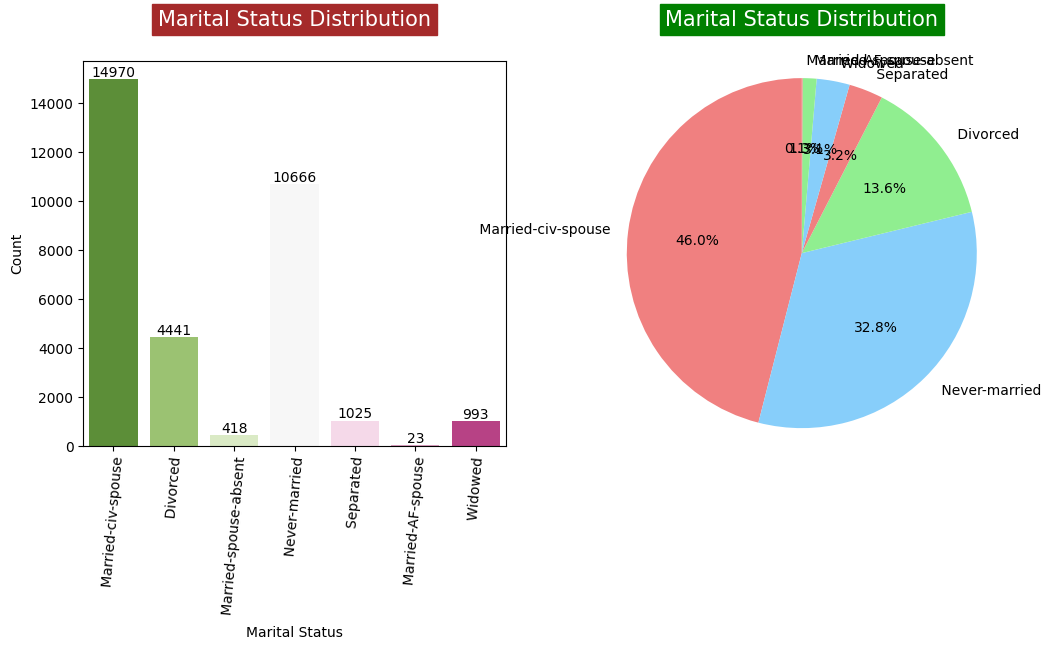

In [43]:
#  countplot for 'Marital_status'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Marital_status", data=df1, palette='PiYG_r', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Marital Status", ylabel="Count")
ax1.set_title("Marital Status Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=85)

marital_status_counts = df1["Marital_status"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
ax2.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Marital Status Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()


Within the 'Marital_status' column, there are seven distinct categories. Among these, 'Married-civ-spouse' stands out as the most prevalent, with a count of 14,970, while 'Married-AF-spouse' is the least common, with only 23 individuals falling into this category.

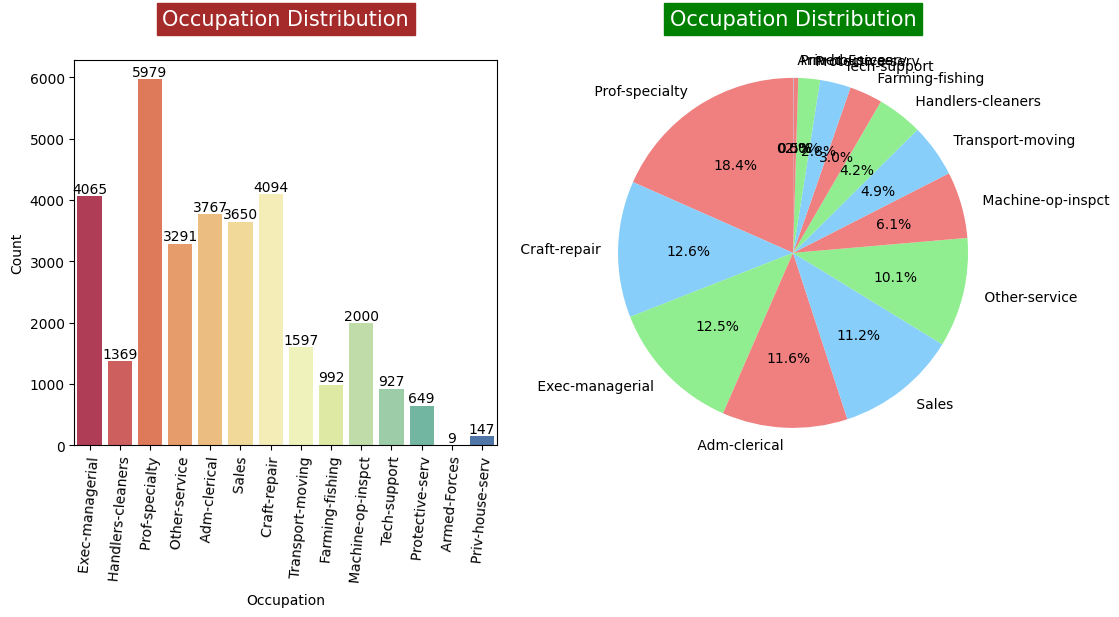

In [44]:
# countplot for 'Occupation'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Occupation", data=df1, palette='Spectral', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Occupation", ylabel="Count")
ax1.set_title("Occupation Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=85)

occupation_counts = df1["Occupation"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
ax2.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Occupation Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()


Observing the 'Occupation' column, I identify a total of 14 distinct categories. Notably, the 'Prof-specialty' category stands out as the most prevalent, with a count of 5,979 individuals falling into this category. Conversely, 'Armed-Forces' represents the least common category, with a count of just 9.

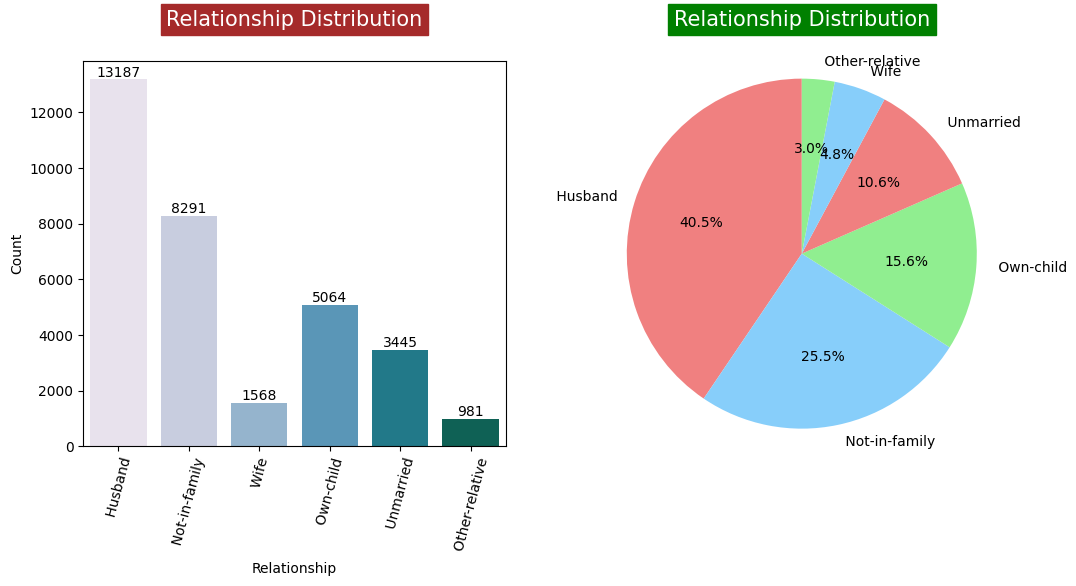

In [45]:
# count plot for Relationship
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Relationship", data=df1, palette='PuBuGn', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Relationship", ylabel="Count")
ax1.set_title("Relationship Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

relationship_counts = df1["Relationship"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
ax2.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Relationship Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

Within the 'Relationship' column, I can identify a total of six distinct categories. Notably, the category 'Husbands' stands out as the most numerous, with a count of 13,187 individuals, representing 40.5% of the total. Conversely, the 'other-relative' category is the least common, accounting for only 981 individuals, or 3.0% of the dataset.

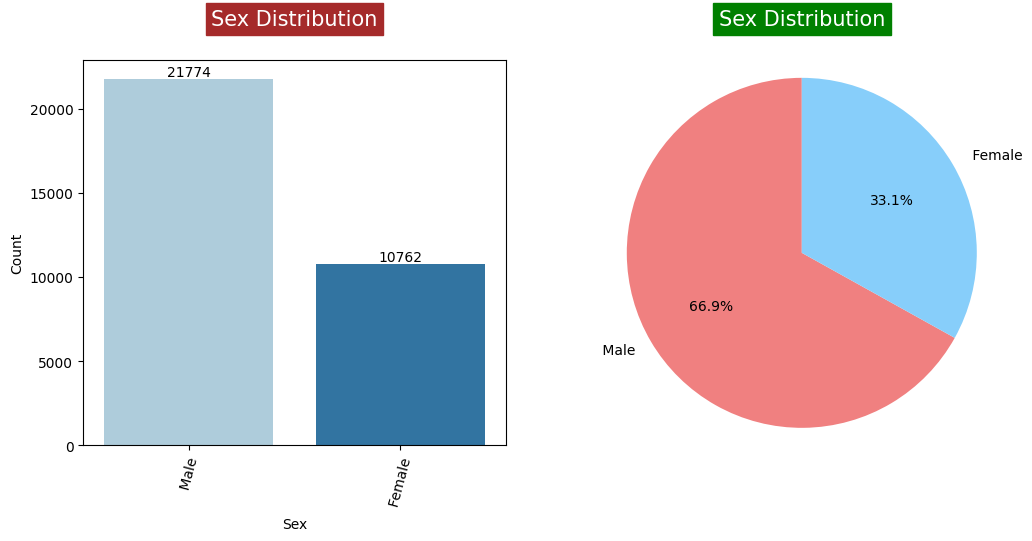

In [46]:
# count plot for Sex
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Sex", data=df1, palette='Paired', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Sex", ylabel="Count")
ax1.set_title("Sex Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

race_counts = df1["Sex"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
ax2.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Sex Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

In the 'Sex' column, I encounter two distinct categories: 'Male' and 'Female'. The 'Male' category is predominant, with a count of 21,774 individuals, representing 66.9% of the dataset, while 'Female' accounts for 10,762 individuals, making up 33.1% of the total count.

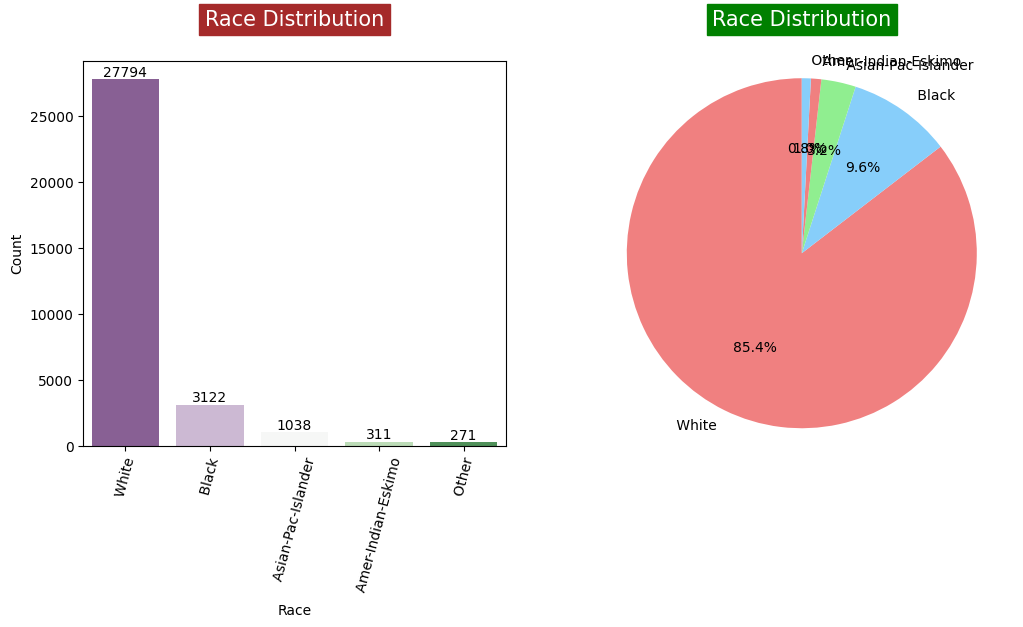

In [47]:
# countplot for 'Race'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Race", data=df1, palette='PRGn', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Race", ylabel="Count")
ax1.set_title("Race Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

race_counts = df1["Race"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
ax2.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Race Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()


Within the 'Race' column, I observe a total of five distinct categories. Notably, the 'White' category prevails as the most numerous, with a count of 27,794 individuals, constituting 85.4% of the dataset. In contrast, the 'Other' category is the least common, with only 271 individuals falling into this group.

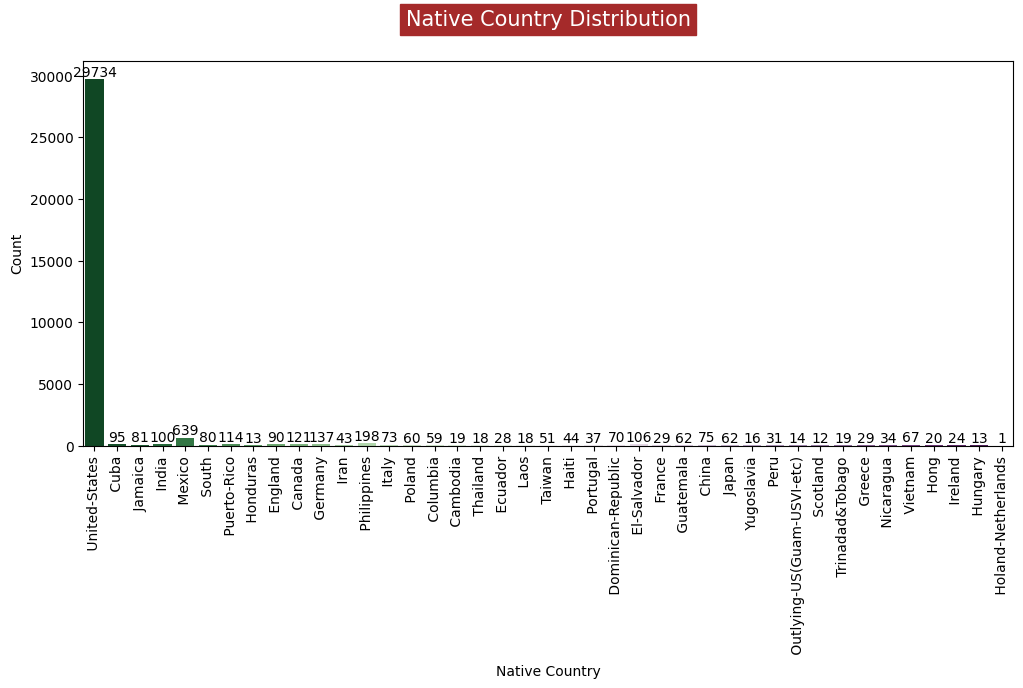

In [48]:
# countplot for 'Native_country'
plt.figure(figsize=(12, 5))

ax=sns.countplot(x="Native_country", data=df1, palette='PRGn_r')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Native Country")
plt.ylabel("Count")
plt.title("Native Country Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
plt.xticks(rotation=90)

plt.show()

Examining the 'Native_country' column, I found that it encompasses data originating from various countries. Notably, the United States is the most frequently represented, with 29,734 entries, while Holand-Netherlands is the least represented, with only one entry.


**Bivariate Analysis:-**

**I will explore the relationships between the features and the target variable. However, before proceeding, we need to encode the target variable into numerical values since it is currently in nominal format. Let's proceed with this encoding step.**

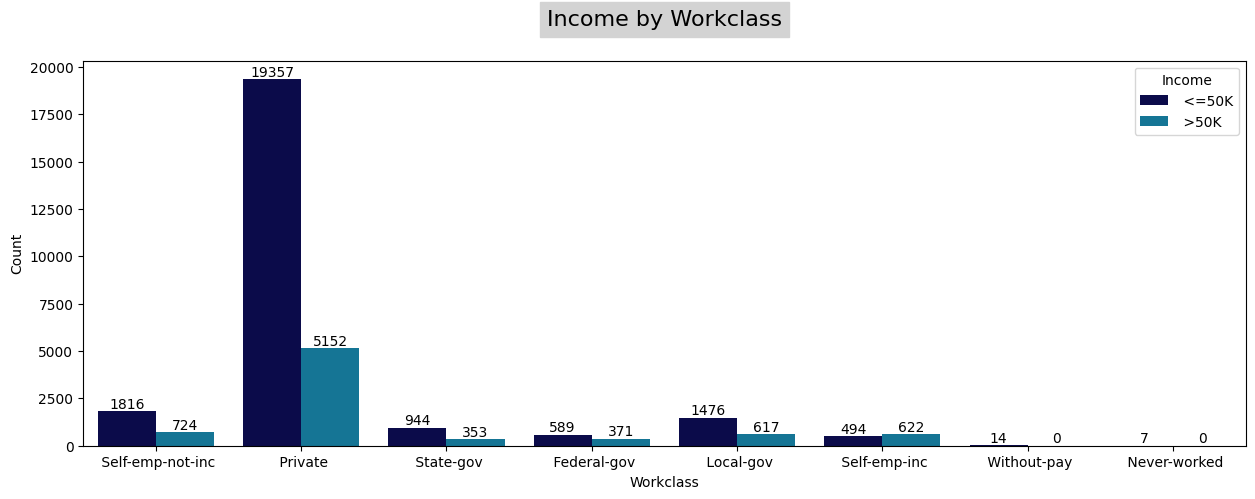

In [49]:
plt.figure(figsize=(15, 5))
ax=sns.countplot(data=df1, x="Workclass", hue="Income", palette='ocean')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Income by Workclass", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()


The majority of the population is employed in the private sector and has an income less than or equal to 50,000.

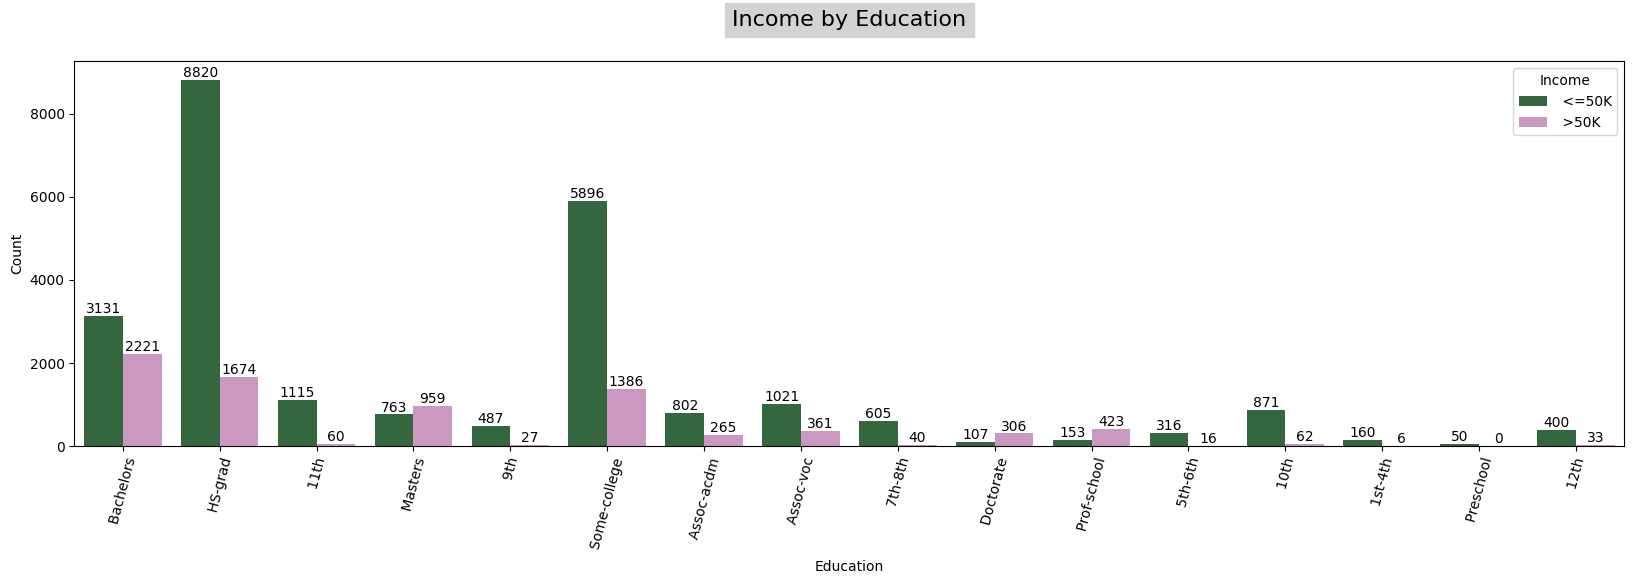

In [50]:
plt.figure(figsize=(20, 5))
ax=sns.countplot(x="Education", data=df1, hue="Income", palette='cubehelix')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Education", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

The majority of the population with an educational level of HS-grad has an income less than or equal to 50,000. when compared to those with an income greater than 50,000.

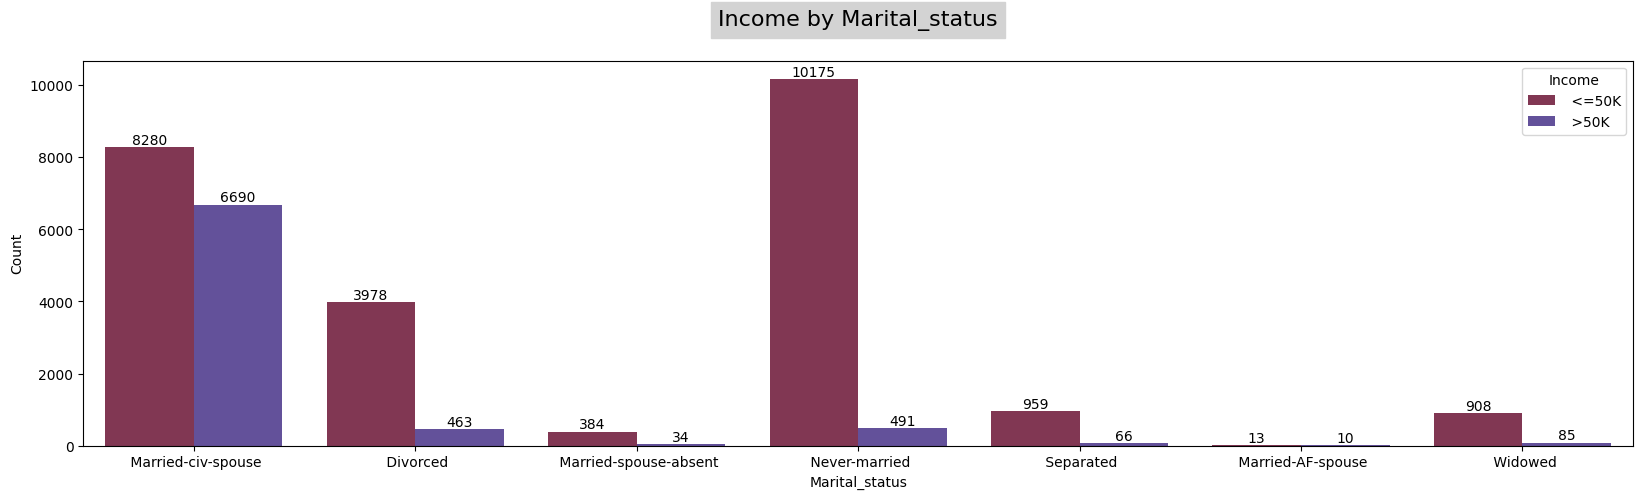

In [51]:
plt.figure(figsize=(20, 5))
ax=sns.countplot(x="Marital_status", data=df1, hue="Income", palette='twilight_r')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Income by Marital_status", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Marital_status")
plt.ylabel("Count")
plt.show()

Individuals with the Marital_status of "Never-married" are predominantly associated with incomes less than or equal to 50,000, while the number of individuals with incomes greater than 50,000 in this category is comparatively smaller.

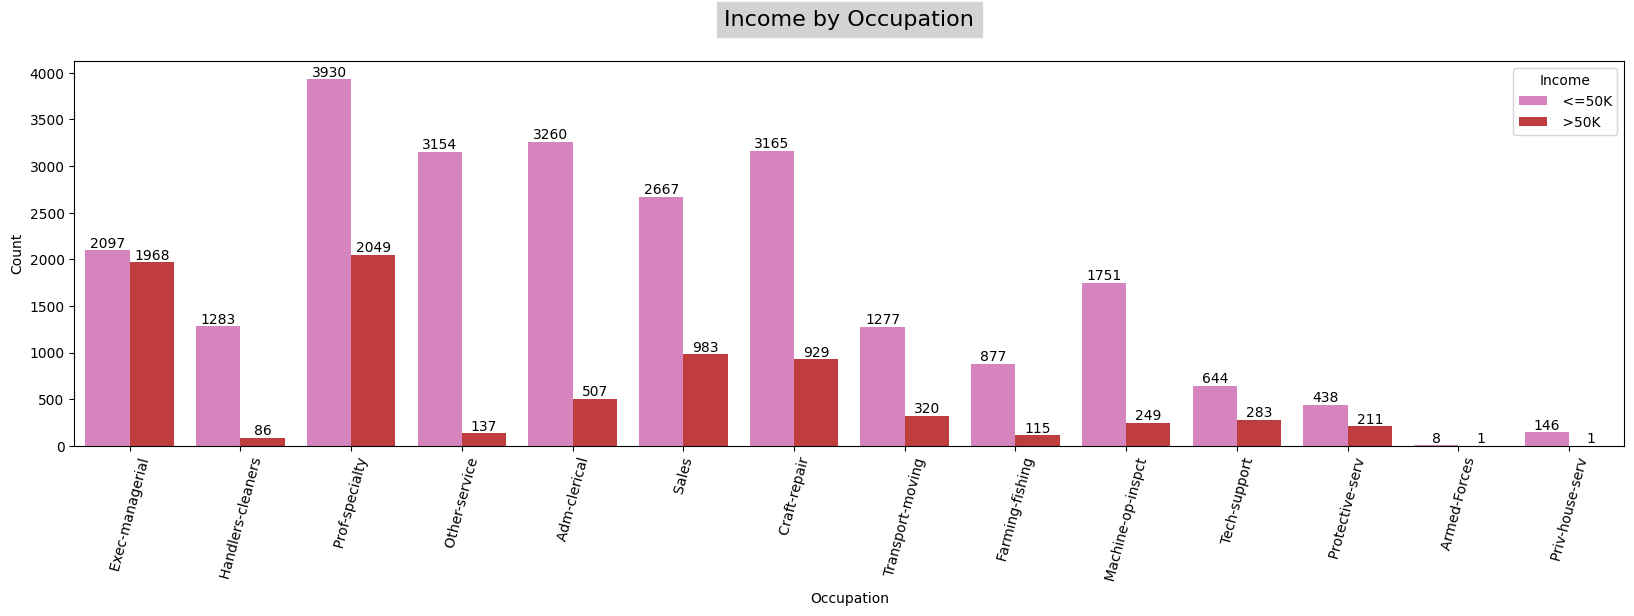

In [52]:
plt.figure(figsize=(20, 5))
ax=sns.countplot(x="Occupation", data=df1, hue="Income", palette='tab10_r')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Occupation", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

The occupation category "Prof-Specialty" is most commonly associated with earnings that do not exceed 50,000. In this occupation tend to have income levels that are equal to or below 50,000 as the prevailing trend. This information may imply that "Prof-Specialty" jobs are generally associated with lower income, though individual circumstances can vary.

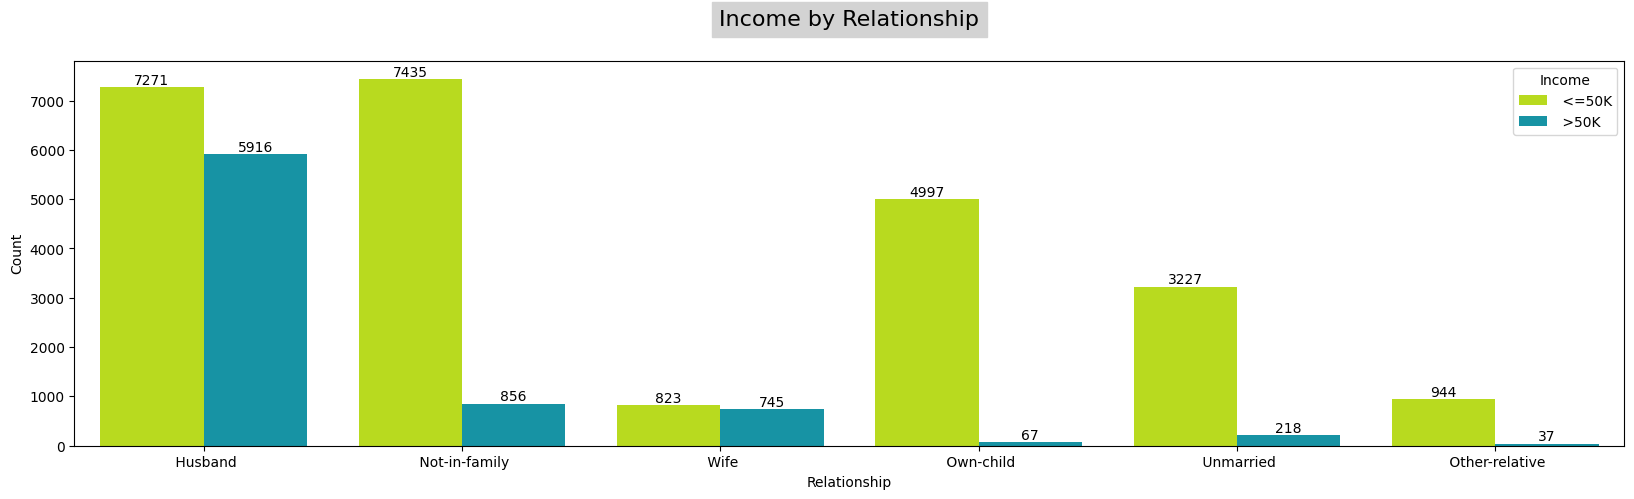

In [53]:
plt.figure(figsize=(20, 5))
ax=sns.countplot(x="Relationship", data=df1, hue="Income", palette='nipy_spectral_r')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Income by Relationship", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.show()

People with a "Not-in-family" relationship status tend to have a higher prevalence of income below or equal to 50,000. There is a correlation between this specific relationship status and lower income levels. This information may imply that those not in a family relationship are more likely to have lower earnings.

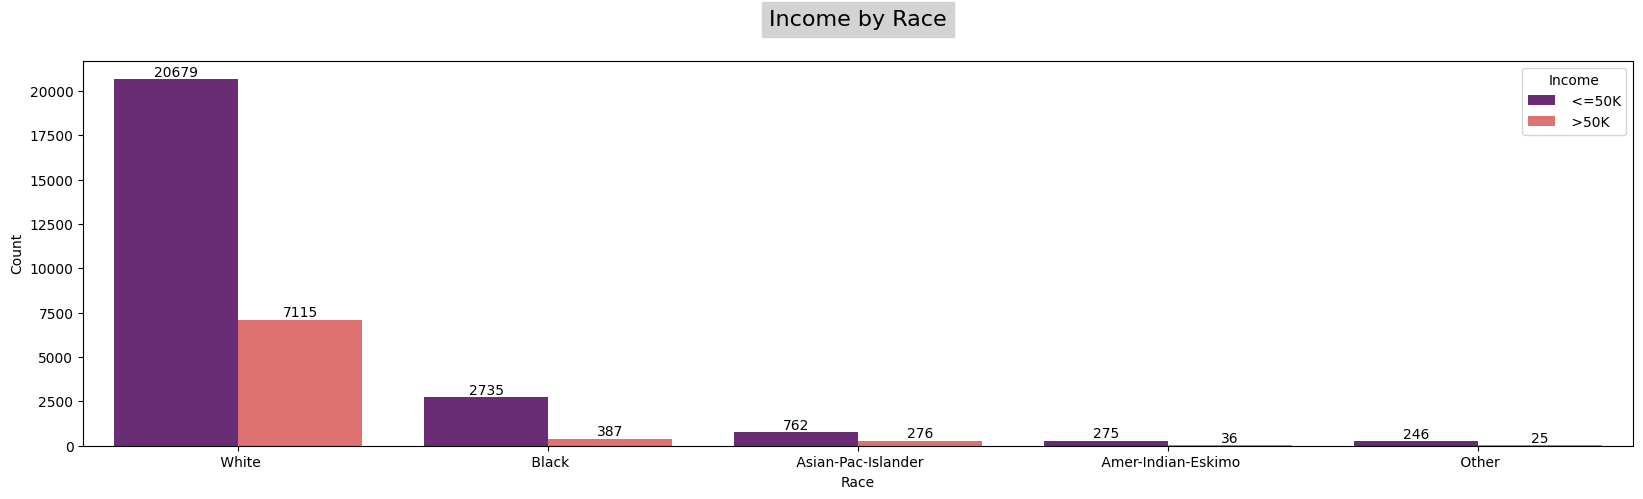

In [54]:
plt.figure(figsize=(20, 5))
ax=sns.countplot(x="Race", data=df1, hue="Income", palette='magma')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Income by Race", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

Individuals who identify as 'White' in terms of their racial background tend to have a higher prevalence of incomes less than or equal to 50,000. In essence, a significant portion of the population within this racial group falls into the income category of less than or equal to 50,000.

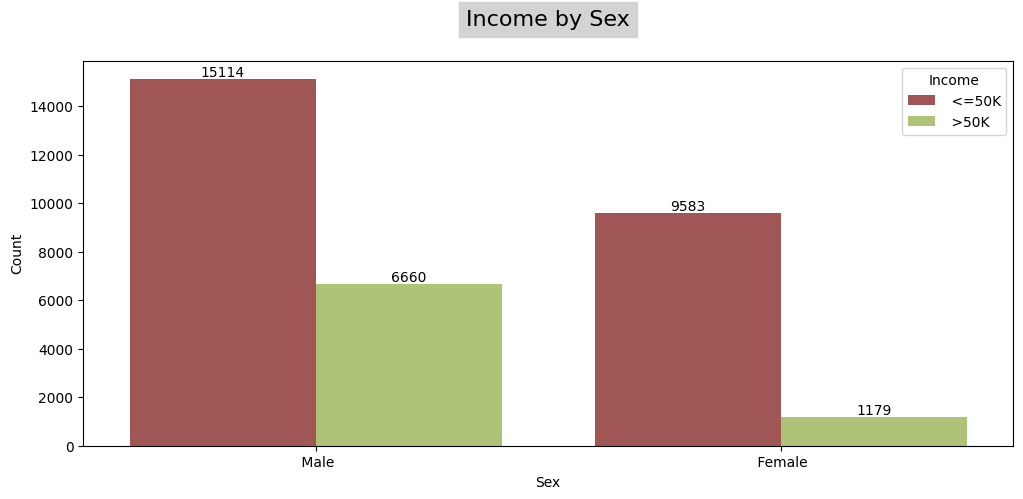

In [55]:
plt.figure(figsize=(12, 5))
ax=sns.countplot(x="Sex", data=df1, hue="Income", palette='tab20b_r')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Income by Sex", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In the specified population, a larger percentage of men have earnings that are 50,000 or lower in contrast to women. The implication is that there may be a gender disparity in income levels, with more men falling into the lower income bracket. This information could be indicative of gender-based wage inequalities or differences in occupational choices.

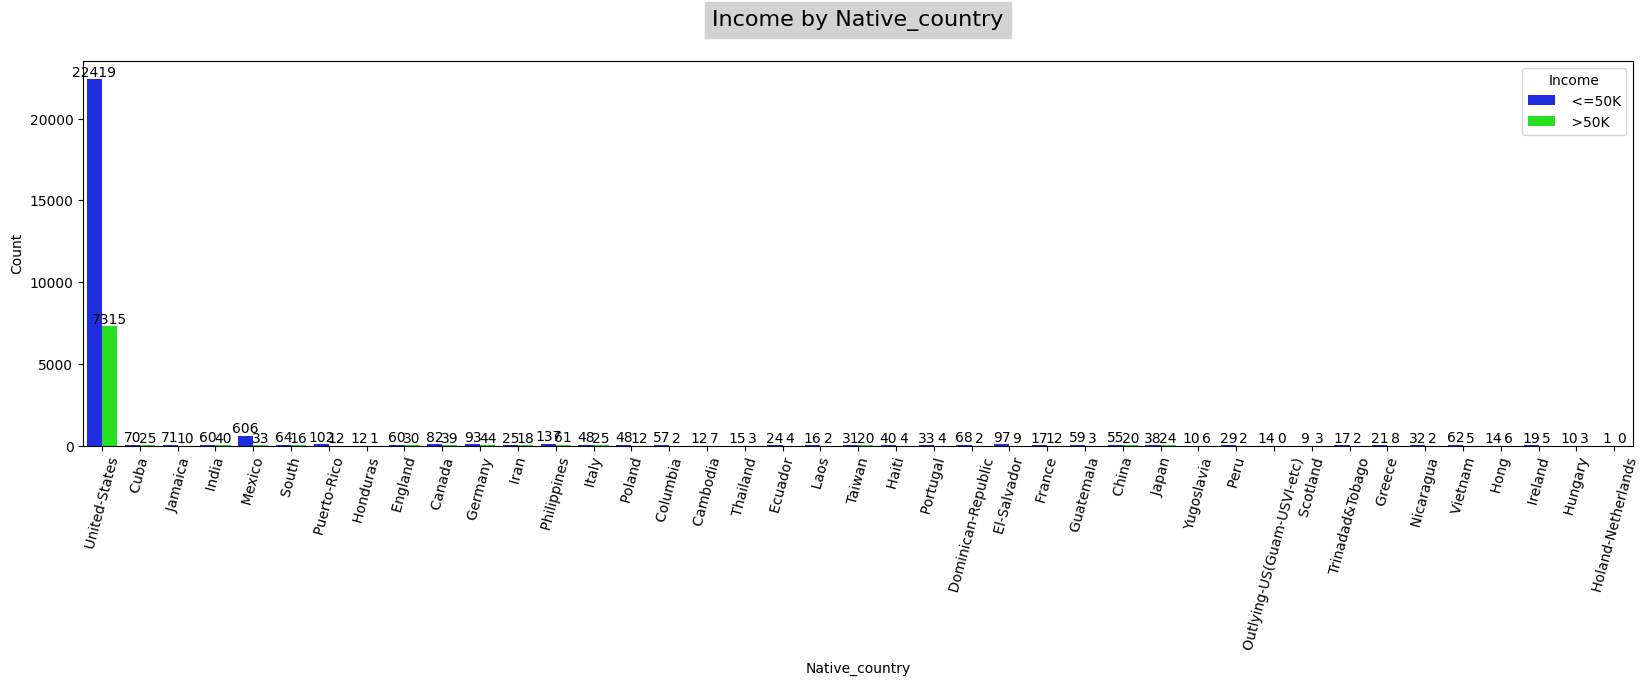

In [56]:
plt.figure(figsize=(20, 5))
ax=sns.countplot(x="Native_country", data=df1, hue="Income", palette='hsv_r')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Native_country", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Native_country")
plt.ylabel("Count")
plt.show()

within the context of the United States, both lower and higher income categories have a greater representation compared to other countries. It suggests that income distributions in the United States exhibit distinctive characteristics when contrasted with income distributions in other nations.

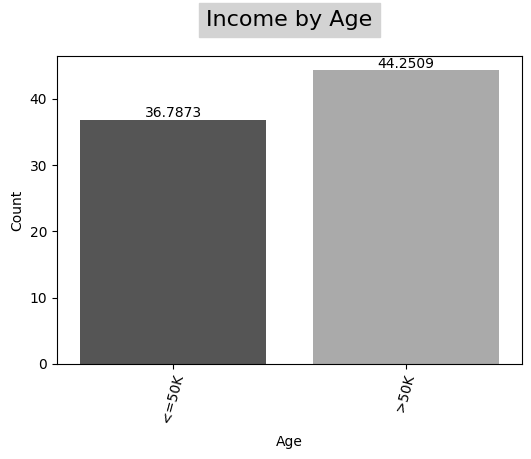

In [57]:
plt.figure(figsize=(6, 4))
ax=sns.barplot(data=df1, y="Age", x="Income", palette='binary_r', errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Age", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

There is a greater prevalence of individuals aged 45 and above earning more than 50,000. This is as opposed to those in the same age group who earn 50,000 or less.

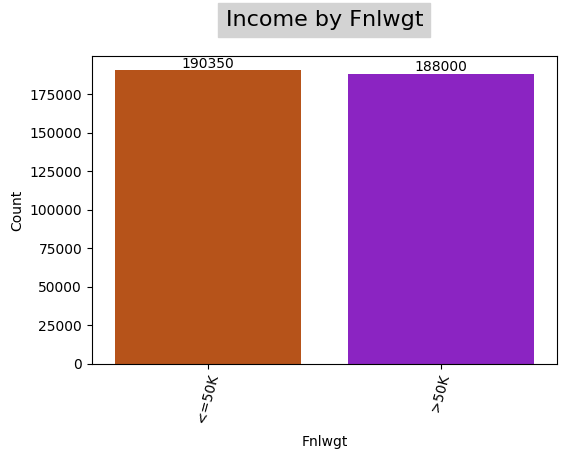

In [58]:
plt.figure(figsize=(6, 4))
ax=sns.barplot(data=df1, y="Fnlwgt",  x="Income", palette='gnuplot_r', errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Fnlwgt", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Fnlwgt")
plt.ylabel("Count")
plt.show()


The final weight of the population remains the same, regardless of whether an individual's income is categorized as ( <=50K and >50K ).

 In simple terms, the weight assigned to individuals for statistical or analytical purposes doesn't vary based on their income level.

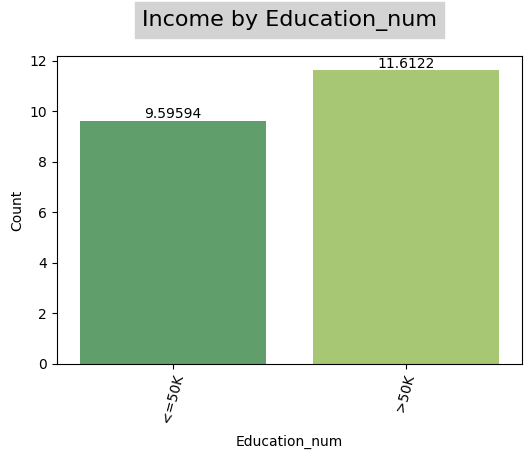

In [59]:
plt.figure(figsize=(6, 4))
ax=sns.barplot(data=df1,y="Education_num", x="Income", palette='summer', errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Education_num", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Education_num")
plt.ylabel("Count")
plt.show()

A link exists between increased income levels and higher educational attainment in the population. This implies that individuals earning more than >50K  are more inclined to have attained advance levels of education compared to those with incomes at <=50K.

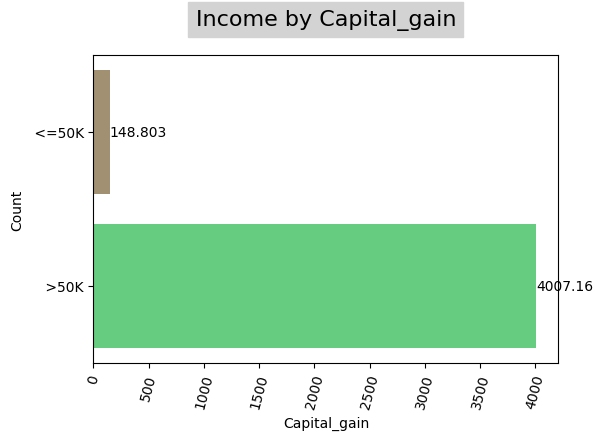

In [60]:
plt.figure(figsize=(6, 4))
ax=sns.barplot(x="Capital_gain", data=df1, y="Income", palette='terrain_r', errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Capital_gain", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Capital_gain")
plt.ylabel("Count")
plt.show()

It's worth noting that individuals earning more than 50,000 have the most substantial capital gains, emphasizing the connection between higher income and increased capital gains among various income groups.

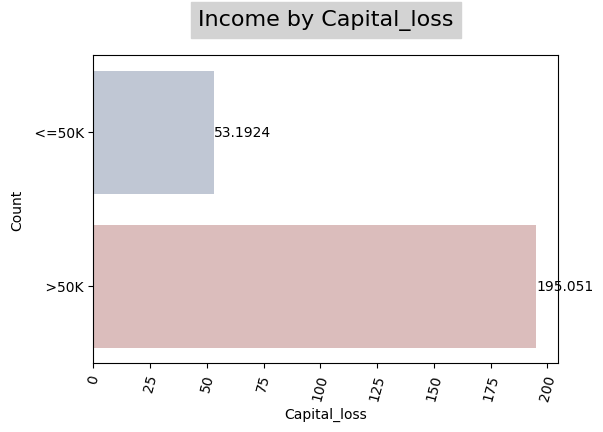

In [61]:
plt.figure(figsize=(6, 4))
ax=sns.barplot(x="Capital_loss", data=df1, y="Income", palette='vlag', errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Capital_loss", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Capital_loss")
plt.ylabel("Count")
plt.show()

Among the p
Among the population, those with incomes exceeding 50K  also exhibit the highest capital losses compared to individuals with incomes of 50K or less.

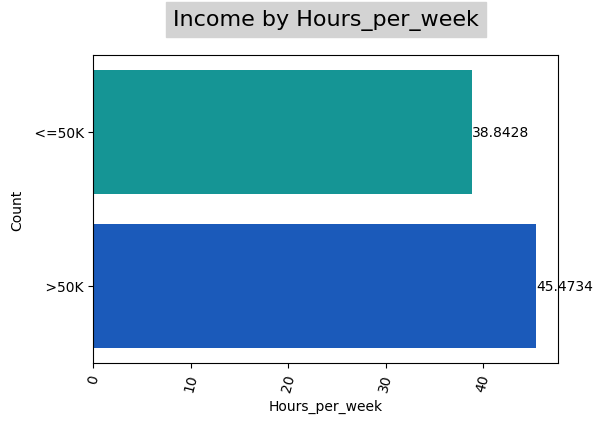

In [62]:
plt.figure(figsize=(6, 4))
ax=sns.barplot(x="Hours_per_week", data=df1, y="Income", palette='winter_r', errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.title("Income by Hours_per_week", backgroundcolor='Lightgray', y=1.07, fontsize=16)
plt.xlabel("Hours_per_week")
plt.ylabel("Count")
plt.show()

 Individuals who earn more than 50,000 typically work more hours per week compared to those with lower incomes. There is a correlation between higher income levels and a higher number of hours worked per week. This could be because higher-paying jobs often require more working hours or because individuals who earn more may choose to work longer hours to increase their earnings.

**Multivariant Analysis:-**

<Figure size 500x500 with 0 Axes>

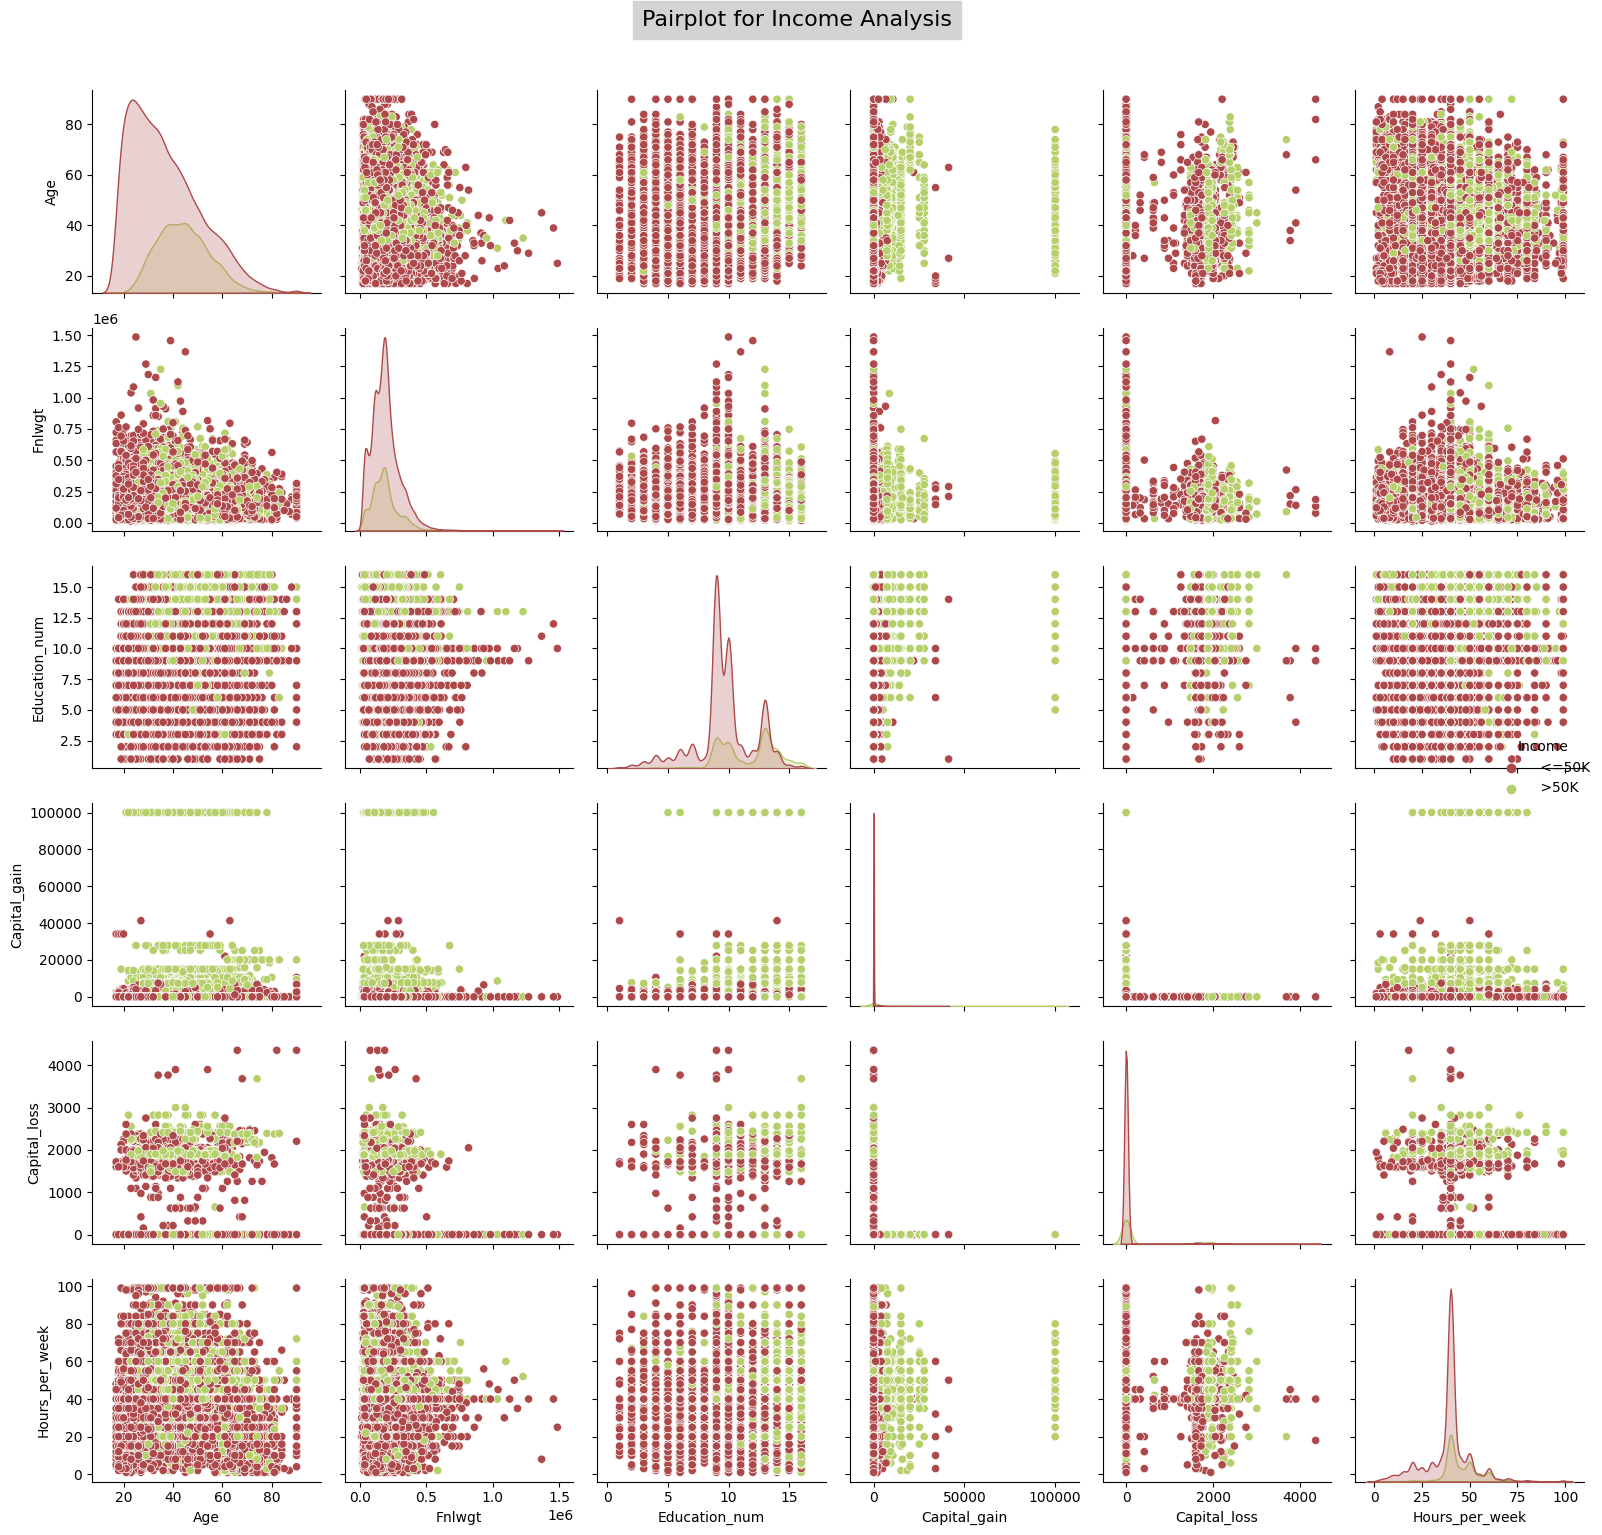

In [63]:
plt.figure(figsize=(5,5))
g = sns.pairplot(df1, hue="Income", palette='tab20b_r', diag_kind="kde")

g.fig.suptitle("Pairplot for Income Analysis", backgroundcolor='Lightgray', y=1.02, fontsize=16)

g.fig.tight_layout()

plt.show()

**The pairplot showcases the relationships between the features and the target variable as pairs of scatterplots. It helps us understand how different features relate to the target variable.**

> * Older individuals tend to have higher incomes. When one Age variable increases, the other variable Income also tends to increase.

> * The "Fnlwgt" feature exhibits a minor adverse association with income, suggesting a subtle link between "Fnlwgt" and income.

> * As per Education_num grapgh indicating that a higher numerical education level corresponds to a substantially higher income.

> *  People with greater capital gains tend to have significantly higher incomes.

> *  Experiencing higher capital losses is linked to a slight reduction in income.

> * The more hours an individual works per week, the more likely they are to have a relatively higher income.

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">
Outliers Detection & Handling</b>
 </div>

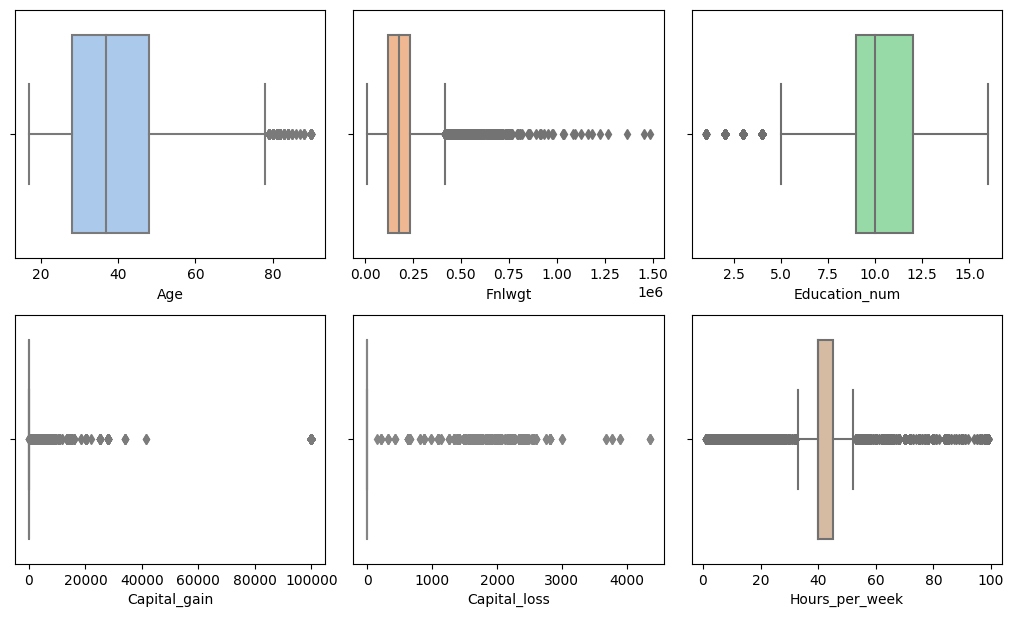

In [64]:
num_cols = len(numerical_cols)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, ax = plt.subplots(ncols=3, nrows=num_rows, figsize=(10, 3 * num_rows))
ax = ax.flatten()

pastel_palette = sns.color_palette('pastel')

for i, col in enumerate(numerical_cols):
    # To handle the case with fewer than 3 numerical columns
    if i >= num_cols:
        break
    # Ensure we don't go out of bounds
    color_idx = i % len(pastel_palette)
    sns.boxplot(x=df1[col], ax=ax[i], palette=[pastel_palette[color_idx]])

# If there are remaining subplots, remove them
for j in range(num_cols, 3 * num_rows):
    fig.delaxes(ax[j])

plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

All the numerical data are having outliers and it is necessary to address the outliers present in the numerical data.

Outlier Treatment:-

In [65]:
numerical_cols

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [66]:
# Features containing outliers
features = df1[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
z=np.abs(zscore(features))
z

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
0      0.836961  1.008703       1.134817      0.145969      0.216747   
1      0.042934  0.245008       0.420646      0.145969      0.216747   
2      1.056935  0.425720       1.198377      0.145969      0.216747   
3      0.776180  1.408036       1.134817      0.145969      0.216747   
4      0.116259  0.898091       1.523683      0.145969      0.216747   
...         ...       ...            ...           ...           ...   
32555  0.849505  0.639647       0.745951      0.145969      0.216747   
32556  0.103715  0.335469       0.420646      0.145969      0.216747   
32557  1.423558  0.358812       0.420646      0.145969      0.216747   
32558  1.216128  0.110897       0.420646      0.145969      0.216747   
32559  0.983611  0.929781       0.420646      1.887612      0.216747   

       Hours_per_week  
0            2.222450  
1            0.035664  
2            0.035664  
3            0.035664  
4            0.035664  
...               ...  
32555        0.197648  
32556        0.035664  
32557        0.035664  
32558        1.655506  
32559        0.035664  

[32536 rows x 6 columns]

In [67]:
threshold = 3
np.where(z>3)
df_new=df1[(z<3).all(axis=1)]
df_new.shape

(29808, 15)

In [68]:
print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df_new.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df_new.shape[0])/df1.shape[0]*100)

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (29808, 15)
Percentage of data loss post outlier removal:  8.384558642734202


In [69]:
#1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

#IQR
IQR=Q3 - Q1
df2=df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Old DataFrame data in Rows and Column:",df1.shape)
print("\nNew DataFrame data in Rows and Column:",df1.shape)
print("\nTotal Dropped rows:",df1.shape[0]-df2.shape[0])
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

Old DataFrame data in Rows and Column: (32536, 15)

New DataFrame data in Rows and Column: (32536, 15)

Total Dropped rows: 13553
Percentage of data loss post outlier removal:  41.65539709859847


**A total of 41.655% of the data was eliminated when using the IQR method to remove outliers. Therefore, the IQR method may not be the suitable choice for outlier removal, and we will opt for the Z-score method instead as data loss is only 8.38%.**

Outliers have removed from numerical columns as the concept of outliers is more applicable to numerical data, where values can be quantitatively measured and compared. Object columns, with their non-numeric nature, don't fit the traditional definition of outliers. Instead, dealing with object columns involves strategies like encoding categorical data, handling missing values, or preserving the unique characteristics of the data.

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">
Transforming Categorical Data with LabelEncoder</b>
 </div>

In [70]:
en= LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]=en.fit_transform(df_new[i].values.reshape(-1,1))

In [71]:
df_new.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          8             13               2   
1   38          3  215646         10              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          8             13               2   
4   37          3  284582         11             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              37       0  
1              40              37       0  
2              40              37       0  
3              40               4       0  
4              40              37       0

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">
Checking Correlation</b>
 </div>

In [72]:
df_cor = df_new.corr()
df_cor

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.032951 -0.074430  -0.004661       0.041431   
Workclass       0.032951   1.000000 -0.022991   0.002653      -0.000674   
Fnlwgt         -0.074430  -0.022991  1.000000  -0.023083      -0.037725   
Education      -0.004661   0.002653 -0.023083   1.000000       0.361097   
Education_num   0.041431  -0.000674 -0.037725   0.361097       1.000000   
Marital_status -0.285335  -0.016093  0.029000  -0.037416      -0.059092   
Occupation     -0.002594   0.008216 -0.002200  -0.042764       0.069639   
Relationship   -0.266802  -0.057609  0.008349  -0.012924      -0.096694   
Race            0.027937   0.045442 -0.010514   0.015588       0.028587   
Sex             0.086589   0.068831  0.028520  -0.027878       0.009276   
Capital_gain    0.131014   0.011974 -0.002374   0.027164       0.154841   
Capital_loss    0.020820  -0.010143  0.002579  -0.000924       0.009481   
Hours_per_week  0.091817   0.027270 -0.015489   0.060787       0.150713   
Native_country -0.001640  -0.001685 -0.060659   0.071462       0.058248   
Income          0.239314  -0.007180 -0.009160   0.074621       0.318731   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.285335   -0.002594     -0.266802  0.027937  0.086589   
Workclass            -0.016093    0.008216     -0.057609  0.045442  0.068831   
Fnlwgt                0.029000   -0.002200      0.008349 -0.010514  0.028520   
Education            -0.037416   -0.042764     -0.012924  0.015588 -0.027878   
Education_num        -0.059092    0.069639     -0.096694  0.028587  0.009276   
Marital_status        1.000000    0.035351      0.184713 -0.066169 -0.123350   
Occupation            0.035351    1.000000     -0.036558 -0.003263  0.049930   
Relationship          0.184713   -0.036558      1.000000 -0.116226 -0.577197   
Race                 -0.066169   -0.003263     -0.116226  1.000000  0.089914   
Sex                  -0.123350    0.049930     -0.577197  0.089914  1.000000   
Capital_gain         -0.068272    0.009530     -0.090370  0.023537  0.070813   
Capital_loss         -0.013817   -0.001857      0.028830  0.001324 -0.026354   
Hours_per_week       -0.195162   -0.022743     -0.257798  0.045400  0.233755   
Native_country       -0.016736   -0.001708     -0.011165  0.117269  0.002282   
Income               -0.194355    0.030533     -0.245913  0.071755  0.209946   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.131014      0.020820        0.091817       -0.001640   
Workclass           0.011974     -0.010143        0.027270       -0.001685   
Fnlwgt             -0.002374      0.002579       -0.015489       -0.060659   
Education           0.027164     -0.000924        0.060787        0.071462   
Education_num       0.154841      0.009481        0.150713        0.058248   
Marital_status     -0.068272     -0.013817       -0.195162       -0.016736   
Occupation          0.009530     -0.001857       -0.022743       -0.001708   
Relationship       -0.090370      0.028830       -0.257798       -0.011165   
Race                0.023537      0.001324        0.045400        0.117269   
Sex                 0.070813     -0.026354        0.233755        0.002282   
Capital_gain        1.000000     -0.009043        0.097199        0.009464   
Capital_loss       -0.009043      1.000000       -0.003101        0.000630   
Hours_per_week      0.097199     -0.003101        1.000000        0.006797   
Native_country      0.009464      0.000630        0.006797        1.000000   
Income              0.342581     -0.016606        0.230589        0.016792   

                  Income  
Age             0.239314  
Workclass      -0.007180  
Fnlwgt         -0.009160  
Education       0.074621  
Education_num   0.318731  
Marital_status -0.194355  
Occupation      0.030533  
Relationship   -0.245913  
Race            0.071755  
Sex             0.20

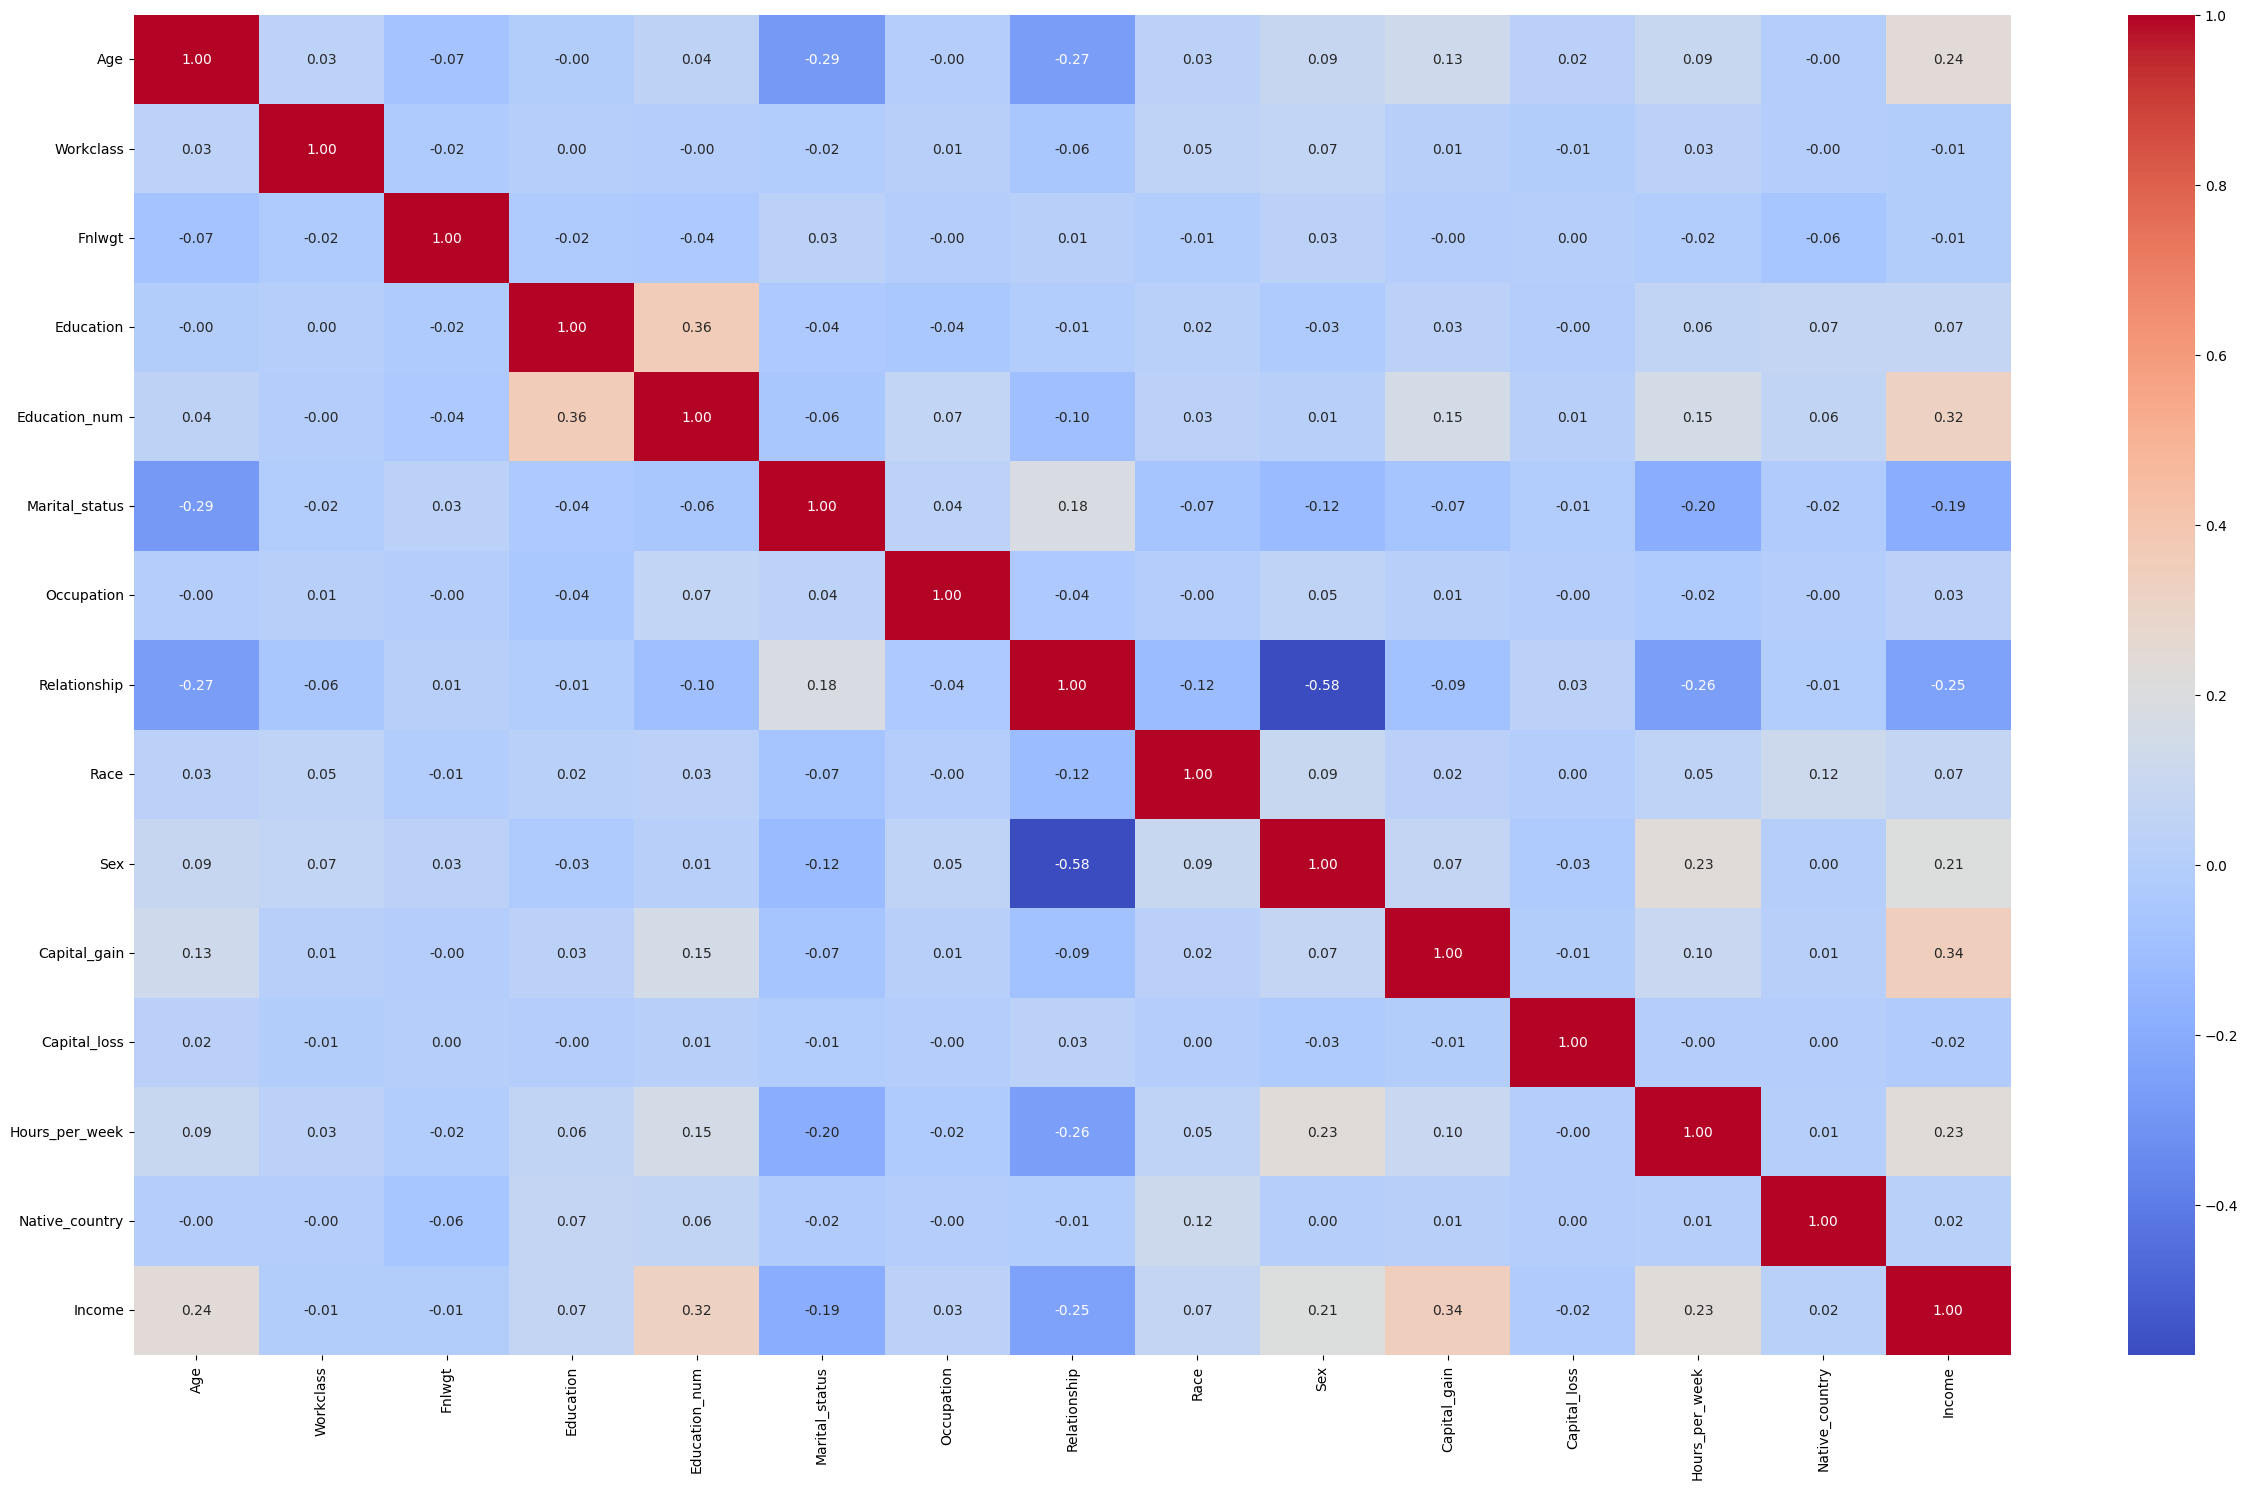

In [73]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

Relationship     -0.245913
Marital_status   -0.194355
Capital_loss     -0.016606
Fnlwgt           -0.009160
Workclass        -0.007180
Native_country    0.016792
Occupation        0.030533
Race              0.071755
Education         0.074621
Sex               0.209946
Hours_per_week    0.230589
Age               0.239314
Education_num     0.318731
Capital_gain      0.342581
Income            1.000000
Name: Income, dtype: float64


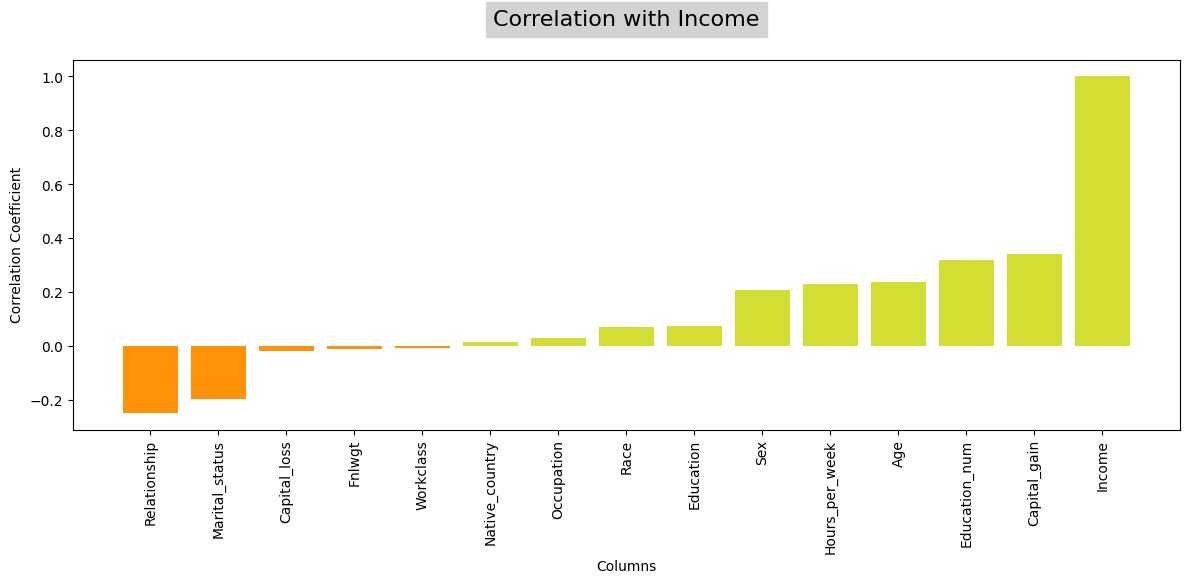

In [74]:
# Correlation of columns with Target variable 'Next_Tmax'
correlations = df_new.corr()['Income'].sort_values()
print(correlations)

colors = ['#FF9209' if c < 0 else '#D2DE32' for c in correlations]
plt.figure(figsize=(12,6))
plt.bar(correlations.index, correlations, color=colors)
plt.title('Correlation with Income', backgroundcolor='lightgray', y=1.07, fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> *  A negative correlation (e.g., -0.245913) suggests that as the value of one attribute decreases, the "Income" tends to decrease, and vice versa.
> * A positive correlation (e.g., 0.342581) suggests that as the value of one attribute increases, the "Income" tends to increase, and vice versa.
> * Values close to 0 (e.g., -0.016606) indicate a weak or negligible correlation.

> **Here are the observations:**

> * "Capital_gain" has the highest positive correlation with "Income" (0.342581), suggesting that higher capital gains are associated with higher income.
> * "Education_num" also has a strong positive correlation (0.318731), indicating that a higher level of education (measured numerically) is associated with higher income.
> * "Age" shows a moderate positive correlation (0.239314), suggesting that older individuals tend to have higher income.
> * "Hours_per_week" has a moderate positive correlation (0.230589), indicating that working more hours per week is associated with higher income.
> * "Sex" has a relatively strong positive correlation (0.209946), suggesting that being male is associated with higher income.
> * "Race" and "Education" have positive correlations (0.071755 and 0.074621, respectively), but they are relatively weak.
> * "Occupation" (0.030533) and "Native_country" (0.016792) also have positive correlations, but they are relatively weak.
> * "Workclass" and "Fnlwgt" have very weak correlations with "Income" (-0.007180 and -0.009160, respectively).
> * "Capital_loss" and "Marital_status" have negative correlations with "Income" (-0.016606 and -0.194355, respectively).
> * "Relationship" has the most negative correlation with "Income" (-0.245913), indicating that this variable has the strongest negative relationship with income.
> **These observations provide insights into the relationships between different attributes and the target variable "Income" in the dataset.**






> * As age increases, income tends to rise as well, indicating a linear correlation between age and income.

### Multivariant Analysis on the basis of Gender\Sex:-

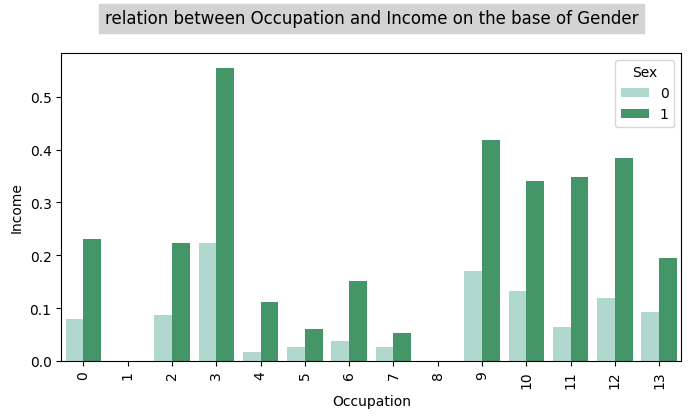

In [75]:
plt.figure(figsize=(8,4))
sns.barplot(x='Occupation',y='Income',hue='Sex',data=df_new, palette='BuGn', errorbar=None).set_title('relation between Occupation and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()


Male professionals consistently earn more than their female counterparts. Among male professionals, those in executive-managerial roles have the highest income, followed by male professionals in professional-specialty positions.

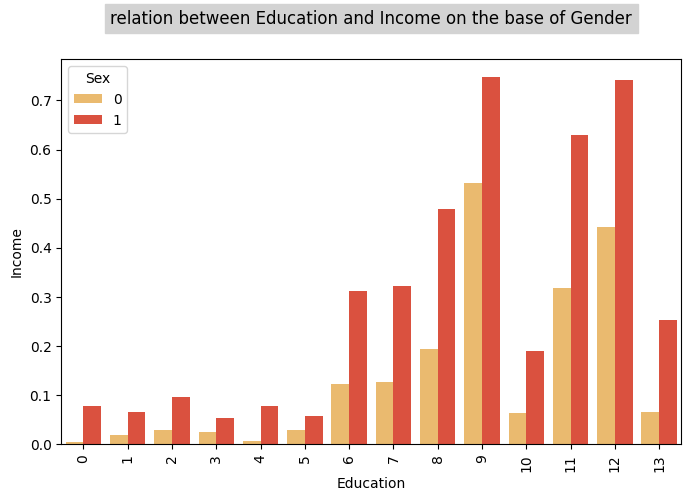

In [76]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='Education',y='Income',hue='Sex',data=df_new, errorbar=None, palette='YlOrRd')
ax.set_title('relation between Education and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()


Male students who pursued doctoral and professional school programs tend to have higher incomes compared to other students.

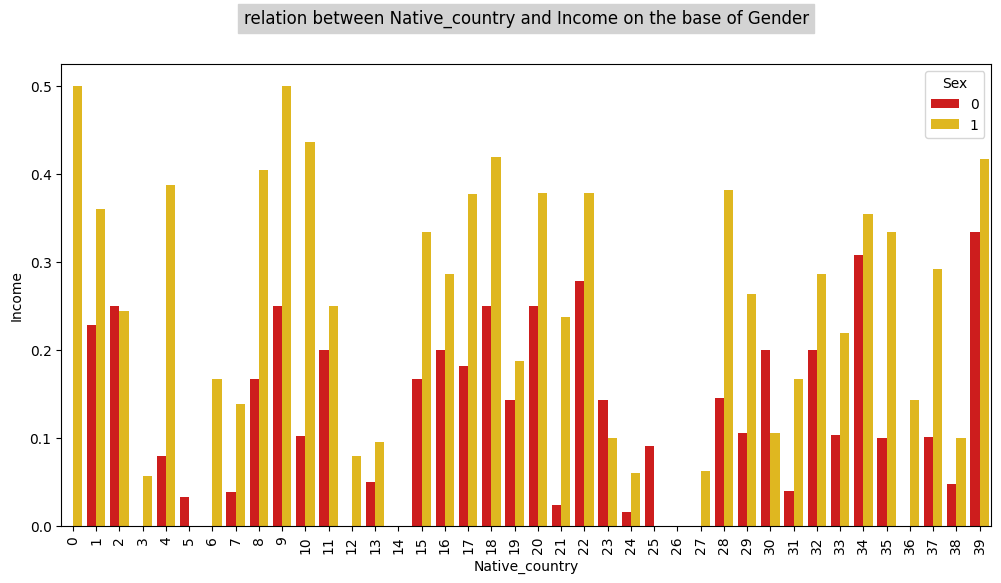

In [77]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Native_country',y='Income',hue='Sex',data=df_new, errorbar=None, palette='hot' )
ax.set_title('relation between Native_country and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()


Among male professionals, those in France have the highest income compared to professionals in other countries.

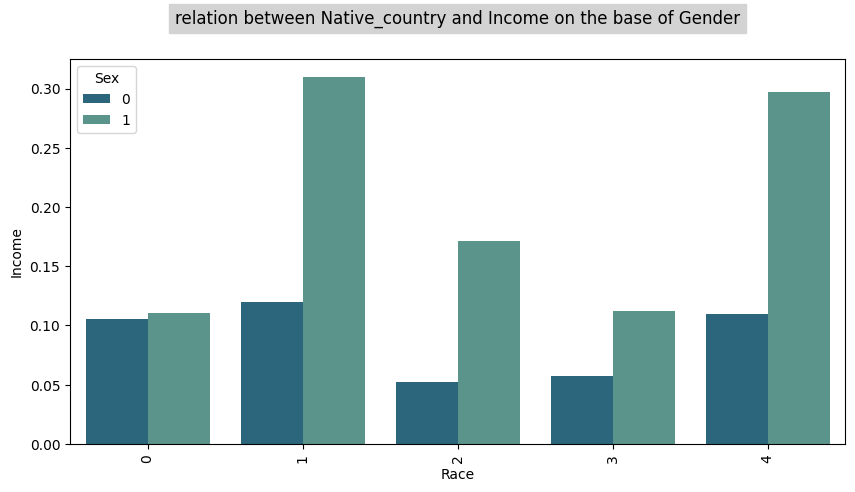

In [78]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Race',y='Income',hue='Sex',data=df_new, errorbar=None, palette='crest_r')
ax.set_title('relation between Native_country and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()

Income levels are highest among male individuals of Asian-Pac-Islander ethnicity, followed closely by White males, when compared to individuals of other racial backgrounds.

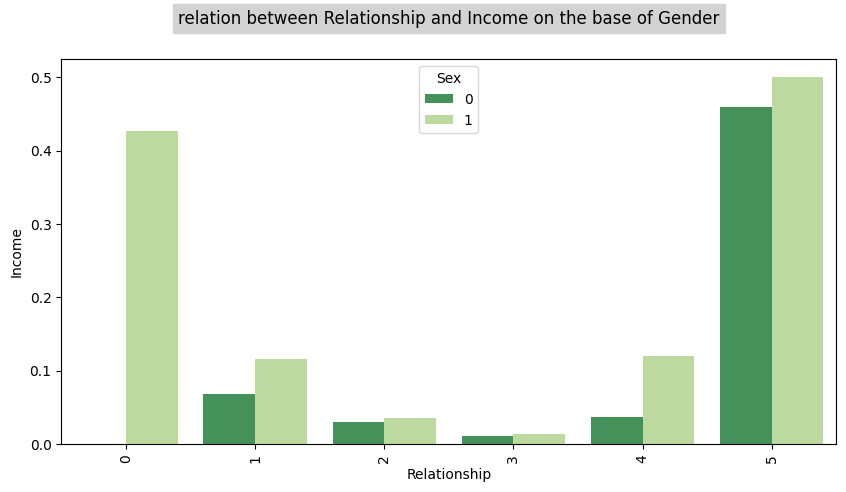

In [79]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Relationship',y='Income',hue='Sex',data=df_new, errorbar=None, palette='YlGn_r')
ax.set_title('relation between Relationship and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()


Husbands tend to have a higher income than individuals in any other relation.

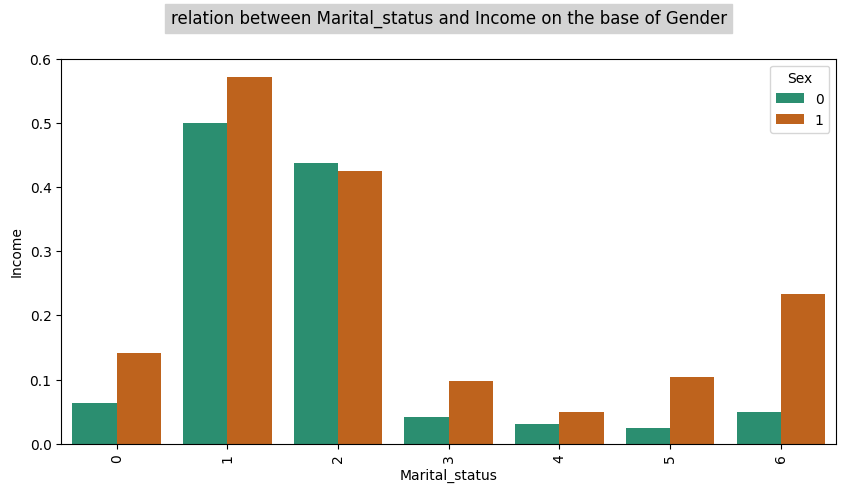

In [80]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Marital_status',y='Income',hue='Sex',data=df_new, errorbar=None, palette='Dark2')
ax.set_title('relation between Marital_status and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()

Female professionals who are in the "Married-civ-spouse" category tend to have the highest income compared to individuals with different marital statuses.






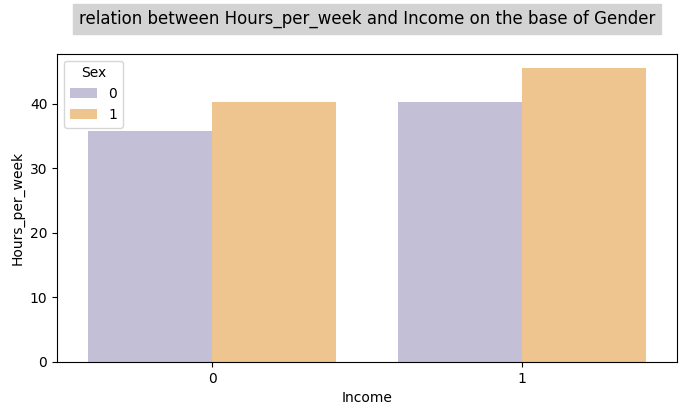

In [81]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x='Income',y='Hours_per_week',hue='Sex',data=df_new, errorbar=None, palette='PuOr_r')
ax.set_title('relation between Hours_per_week and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.show()


Male professionals who earn more than $50,000 annually may work longer hours compared to those with shorter work hours.

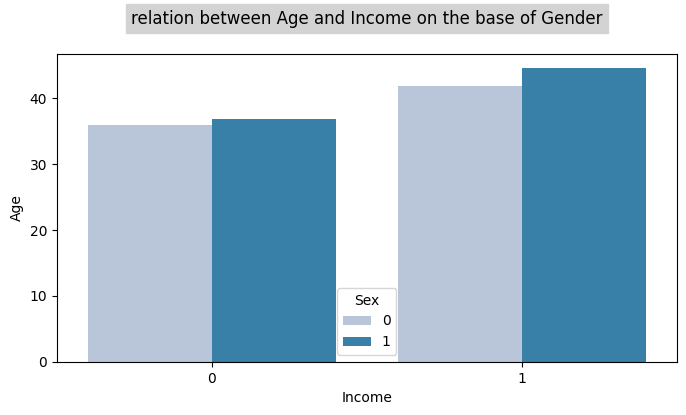

In [82]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x='Income',y='Age',hue='Sex',data=df_new, errorbar=None, palette='PuBu')
ax.set_title('relation between Age and Income on the base of Gender', backgroundcolor='Lightgray', y=1.07)
plt.show()


Elderly male and female professionals typically have higher incomes compared to their younger counterparts.

**Removing unnecessary columns:-**

In [83]:

df_new.drop(["Capital_gain","Capital_loss"], axis=1,  inplace = True)

In [84]:
df_new.shape

(29808, 13)

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Skewbness</b>
 </div>

In [85]:
df_new.skew()

Age               0.491125
Workclass         0.092139
Fnlwgt            0.635160
Education        -1.073330
Education_num    -0.169811
Marital_status   -0.048428
Occupation        0.005568
Relationship      0.743548
Race             -2.435806
Sex              -0.679933
Hours_per_week   -0.353124
Native_country   -4.290422
Income            1.329852
dtype: float64

In [86]:
PT = PowerTransformer(method='yeo-johnson')

df_new[['Age', 'Fnlwgt', 'Hours_per_week']] = PT.fit_transform(df_new[['Age', 'Fnlwgt', 'Hours_per_week']].values)

df_new.head()

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0  0.928278          5 -1.114017          8             13               2   
1  0.130080          3  0.425181         10              9               0   
2  1.103227          3  0.605059          1              7               2   
3 -0.709117          3  1.484239          8             13               2   
4  0.054756          3  1.046089         11             14               2   

   Occupation  Relationship  Race  Sex  Hours_per_week  Native_country  Income  
0           3             0     4    1       -2.217845              37       0  
1           5             1     4    1       -0.036646              37       0  
2           5             0     2    1       -0.036646              37       0  
3           9             5     2    0       -0.036646               4       0  
4           3             5     4    0       -0.036646              37       0

A skewness threshold of ±0.25 is applied, and based on this threshold, several columns in the dataset exhibit skewness. These columns include Age, Fnlwgt, Education, Relationship, Race, Sex, Hours_per_week, Native_country, and Income.

Notably, the data in the Native_country column displays a significant negative skew, while the Relationship column exhibits a substantial positive skew. It's important to acknowledge that none of these columns follow a normal distribution; all of them display some level of skewness.

However, it's worth noting that Education, Relationship, Race, Sex, and Native_country are categorical columns, and as such, addressing skewness is not applicable. Additionally, the Income column serves as the target variable, and skewness removal is not recommended for it.

The only column for which skewness will be addressed are, age Fnlwgt and Hour_per_week as it contains continuous data.

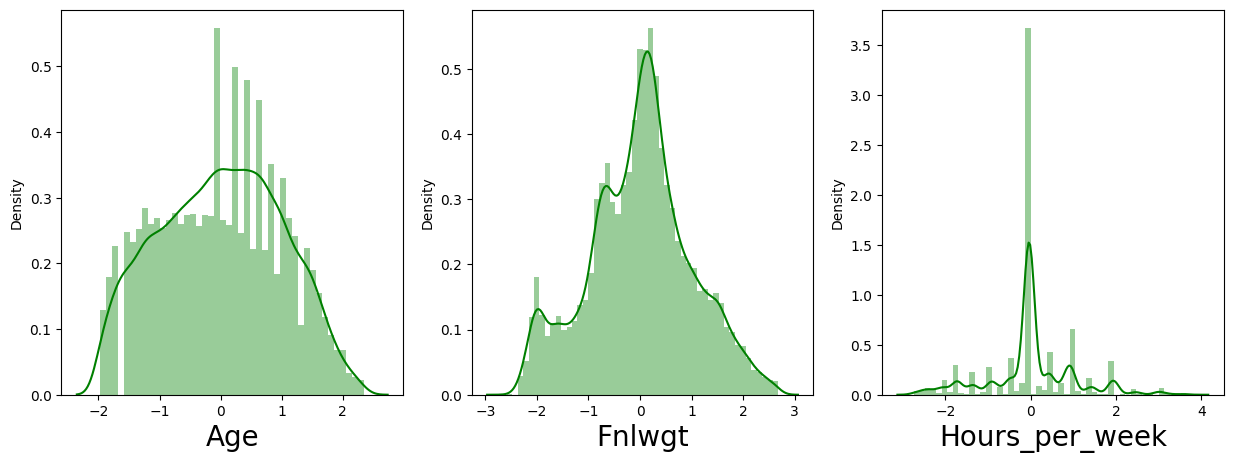

In [87]:
collist=['Age', 'Fnlwgt', 'Hours_per_week']
plt.figure(figsize=(15,5), facecolor='white')
plotnumber = 1

for column in df_new[collist]:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df_new[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

While the data does not exhibit a normal distribution, it has become less skewed in comparison to the previous dataset.

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">
Splitting Dataset for Train & Test</b>
 </div>

In [88]:
df_new.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [89]:
x = df_new.drop('Income',axis=1)
y = df_new["Income"]

x.shape, y.shape

((29808, 12), (29808,))

In [90]:
y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

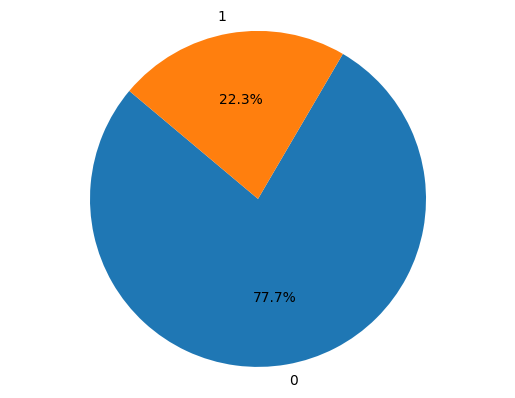

In [91]:
y_counts = y.value_counts()

plt.pie(y_counts.values, labels= y_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()


The data lacks balance, and, therefore, we will employ an oversampling method to rectify this imbalance.

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">
Addressing the imbalanced dataset through the application of SMOTE</b>
 </div>

In [92]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [93]:
y.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

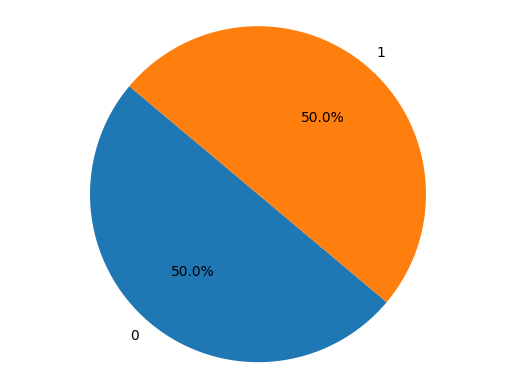

In [94]:
y_counts = y.value_counts()

plt.pie(y_counts.values, labels= y_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()

Data has achieved balance.

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Feature Scalling</b>
 </div>

In [95]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0  0.825862   1.710267 -1.157232  -0.421697       0.962075       -0.309111   
1 -0.047993  -0.045766  0.449402   0.223090      -0.638586       -1.812844   
2  1.017393  -0.045766  0.637161  -2.678452      -1.438917       -0.309111   
3 -0.966734  -0.045766  1.554859  -0.421697       0.962075       -0.309111   
4 -0.130457  -0.045766  1.097513   0.545484       1.362240       -0.309111   

   Occupation  Relationship      Race       Sex  Hours_per_week  \
0   -0.799898     -0.735044  0.365170  0.627139       -2.467743   
1   -0.296420     -0.125901  0.365170  0.627139       -0.192948   
2   -0.296420     -0.735044 -2.108934  0.627139       -0.192948   
3    0.710535      2.310671 -2.108934 -1.594543       -0.192948   
4   -0.799898      2.310671  0.365170 -1.594543       -0.192948   

   Native_country  
0        0.249997  
1        0.249997  
2        0.249997  
3       -5.391245  
4        0.249997


<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Multicollinearity</b>
 </div>

In [96]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif

VIF values        Features
0     1.210392             Age
1     1.007737       Workclass
2     1.009747          Fnlwgt
3     1.087115       Education
4     1.140346   Education_num
5     1.161290  Marital_status
6     1.016712      Occupation
7     1.971628    Relationship
8     1.040541            Race
9     1.831676             Sex
10    1.147508  Hours_per_week
11    1.029783  Native_country

There is no evidence of multicollinearity among the columns. Consequently, we are now prepared to build our model.

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Model Devlopments</b>
 </div>

Logistic Regression
accuracy_score: 0.7594731728381734
classification_report:
 {'0': {'precision': 0.7704654895666132, 'recall': 0.7325049051667757, 'f1-score': 0.7510058113544926, 'support': 4587}, '1': {'precision': 0.7496940024479805, 'recall': 0.7859281437125748, 'f1-score': 0.7673835873877636, 'support': 4676}, 'accuracy': 0.7594731728381734, 'macro avg': {'precision': 0.7600797460072968, 'recall': 0.7592165244396752, 'f1-score': 0.759194699371128, 'support': 9263}, 'weighted avg': {'precision': 0.7599799585543356, 'recall': 0.7594731728381734, 'f1-score': 0.7592733791761027, 'support': 9263}}


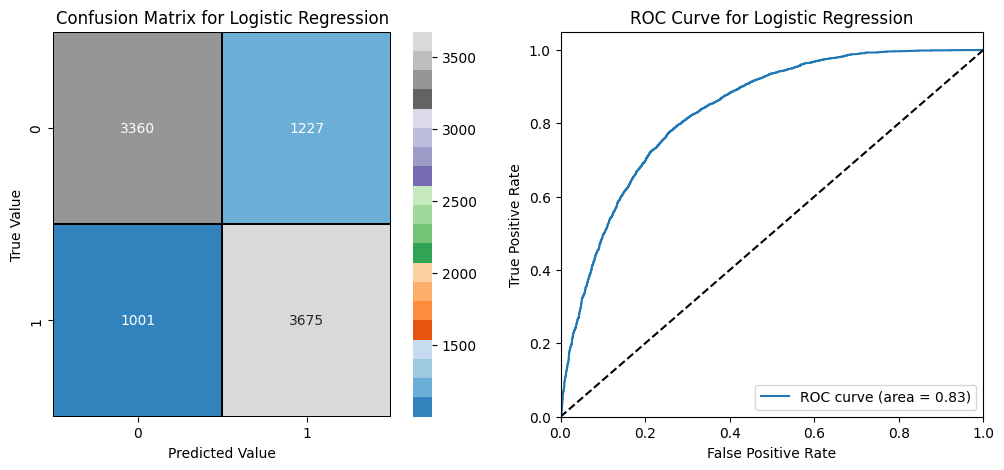

Random Forest Classifier
accuracy_score: 0.8894526611249055
classification_report:
 {'0': {'precision': 0.9057806099226218, 'recall': 0.8671023965141612, 'f1-score': 0.886019590382903, 'support': 4590}, '1': {'precision': 0.8747176011501335, 'recall': 0.9114059490691204, 'f1-score': 0.8926849717040453, 'support': 4673}, 'accuracy': 0.8894526611249055, 'macro avg': {'precision': 0.8902491055363777, 'recall': 0.8892541727916408, 'f1-score': 0.8893522810434742, 'support': 9263}, 'weighted avg': {'precision': 0.8901099373550047, 'recall': 0.8894526611249055, 'f1-score': 0.8893821432182368, 'support': 9263}}


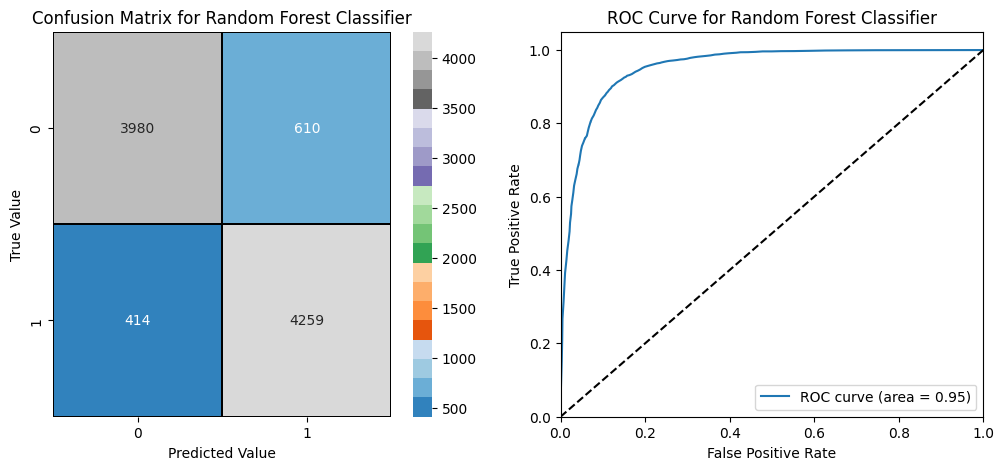

Decision Tree Classifier
accuracy_score: 0.8431393716938357
classification_report:
 {'0': {'precision': 0.8491020586946999, 'recall': 0.8353803059685413, 'f1-score': 0.8421852937981971, 'support': 4641}, '1': {'precision': 0.8373429848839685, 'recall': 0.8509303331890956, 'f1-score': 0.8440819830453912, 'support': 4622}, 'accuracy': 0.8431393716938357, 'macro avg': {'precision': 0.8432225217893342, 'recall': 0.8431553195788184, 'f1-score': 0.8431336384217941, 'support': 9263}, 'weighted avg': {'precision': 0.8432345817268493, 'recall': 0.8431393716938357, 'f1-score': 0.8431316932044943, 'support': 9263}}


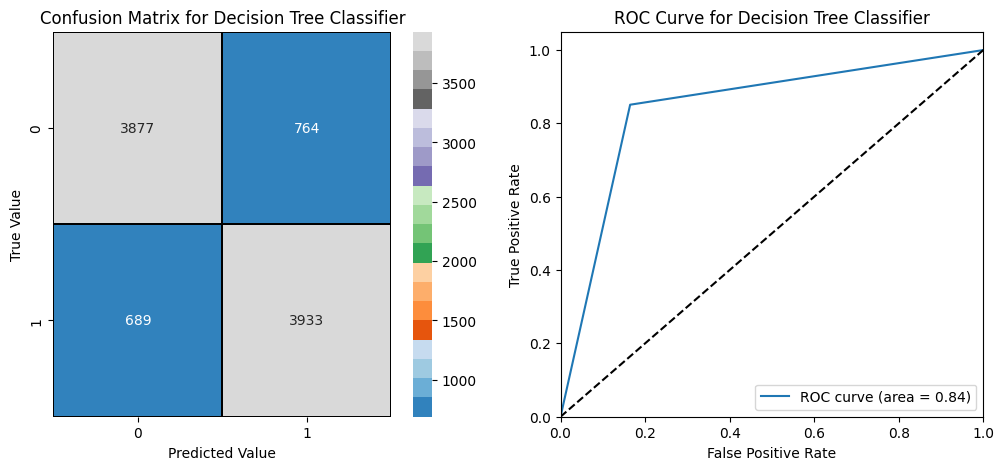

K-Nearest Neighbors
accuracy_score: 0.8526395336284142
classification_report:
 {'0': {'precision': 0.9115908506810588, 'recall': 0.7764886164623468, 'f1-score': 0.8386334082042795, 'support': 4568}, '1': {'precision': 0.8099404318689502, 'recall': 0.9267305644302449, 'f1-score': 0.8644084632959174, 'support': 4695}, 'accuracy': 0.8526395336284142, 'macro avg': {'precision': 0.8607656412750044, 'recall': 0.8516095904462959, 'f1-score': 0.8515209357500984, 'support': 9263}, 'weighted avg': {'precision': 0.8600688042249592, 'recall': 0.8526395336284142, 'f1-score': 0.8516976296935637, 'support': 9263}}


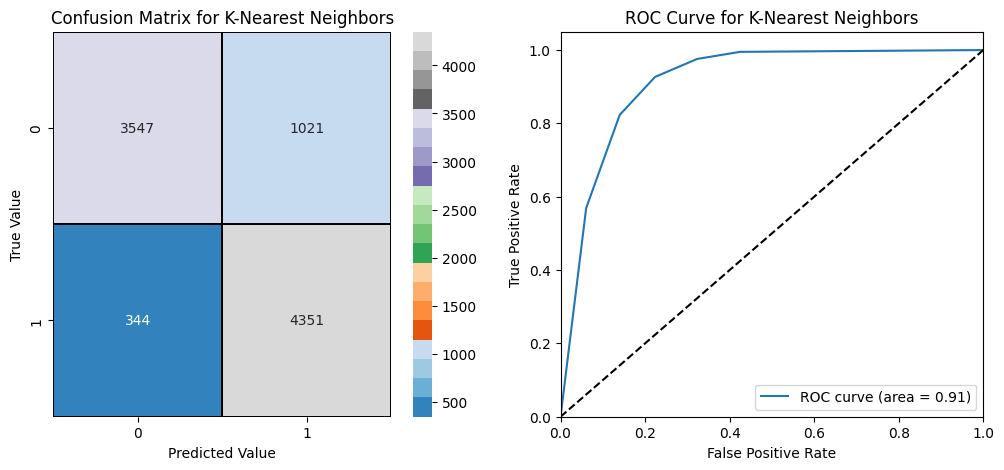

Gaussian Naive Bayes
accuracy_score: 0.7785814530929505
classification_report:
 {'0': {'precision': 0.7867630449514343, 'recall': 0.7588235294117647, 'f1-score': 0.7725407563491183, 'support': 4590}, '1': {'precision': 0.7710918114143921, 'recall': 0.7979884442542264, 'f1-score': 0.7843096014302241, 'support': 4673}, 'accuracy': 0.7785814530929505, 'macro avg': {'precision': 0.7789274281829133, 'recall': 0.7784059868329956, 'f1-score': 0.7784251788896712, 'support': 9263}, 'weighted avg': {'precision': 0.7788572180790821, 'recall': 0.7785814530929505, 'f1-score': 0.7784779055517533, 'support': 9263}}


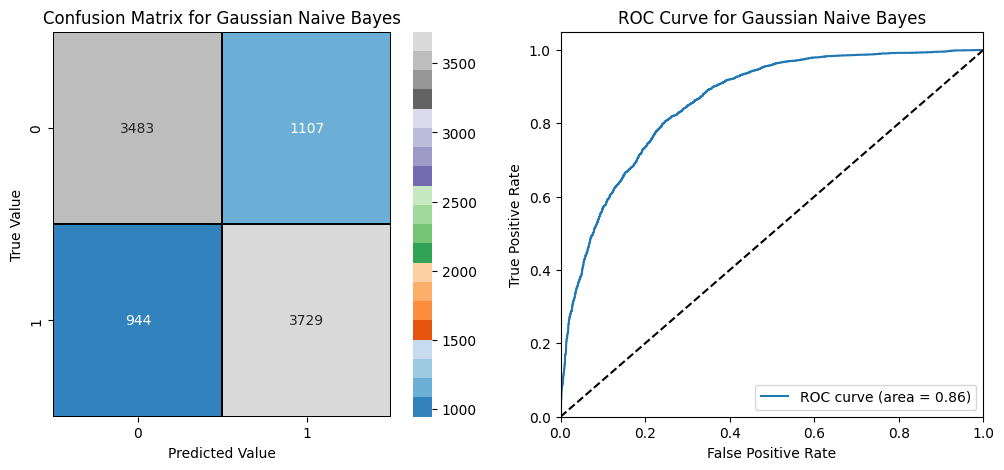

Gradient Boosting Classifier
accuracy_score: 0.8535031847133758
classification_report:
 {'0': {'precision': 0.8780315516835413, 'recall': 0.8163309982486865, 'f1-score': 0.8460578559273966, 'support': 4568}, '1': {'precision': 0.8327352472089314, 'recall': 0.8896698615548456, 'f1-score': 0.8602615590567398, 'support': 4695}, 'accuracy': 0.8535031847133758, 'macro avg': {'precision': 0.8553833994462363, 'recall': 0.853000429901766, 'f1-score': 0.8531597074920683, 'support': 9263}, 'weighted avg': {'precision': 0.8550728828388588, 'recall': 0.8535031847133758, 'f1-score': 0.8532570771507871, 'support': 9263}}


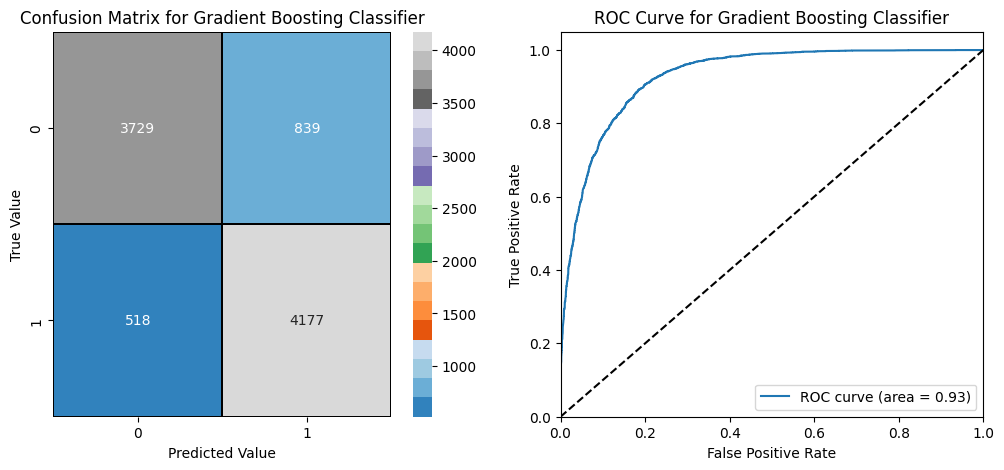

XGBoost Classifier
accuracy_score: 0.8847025801576163
classification_report:
 {'0': {'precision': 0.8981711447279296, 'recall': 0.8657236126224157, 'f1-score': 0.8816489361702128, 'support': 4595}, '1': {'precision': 0.872362432767894, 'recall': 0.9033847472150814, 'f1-score': 0.8876026099768469, 'support': 4668}, 'accuracy': 0.8847025801576163, 'macro avg': {'precision': 0.8852667887479118, 'recall': 0.8845541799187486, 'f1-score': 0.8846257730735299, 'support': 9263}, 'weighted avg': {'precision': 0.8851650918908955, 'recall': 0.8847025801576163, 'f1-score': 0.8846492329778742, 'support': 9263}}


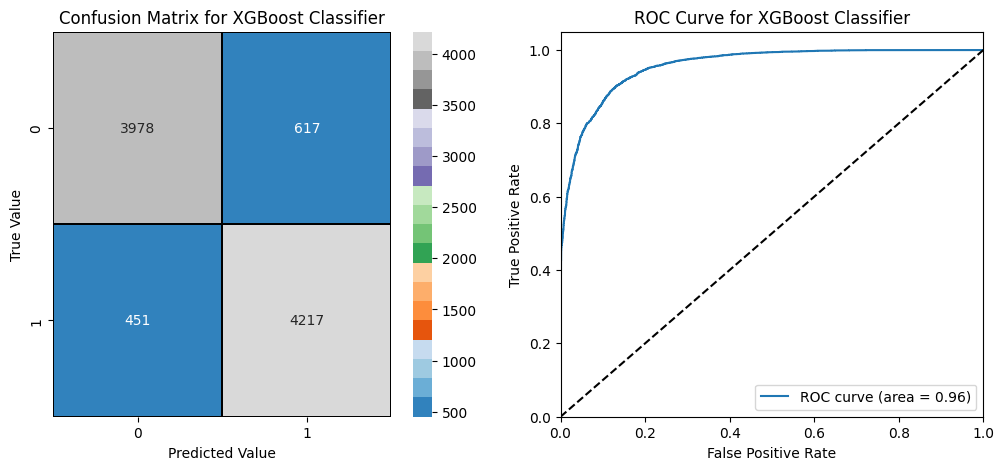

ExtraTrees Classifier
accuracy_score: 0.8907481377523481
classification_report:
 {'0': {'precision': 0.9144522144522145, 'recall': 0.8588003502626971, 'f1-score': 0.8857529916459698, 'support': 4568}, '1': {'precision': 0.8702996179368591, 'recall': 0.9218317358892438, 'f1-score': 0.8953247827885809, 'support': 4695}, 'accuracy': 0.8907481377523481, 'macro avg': {'precision': 0.8923759161945368, 'recall': 0.8903160430759705, 'f1-score': 0.8905388872172753, 'support': 9263}, 'weighted avg': {'precision': 0.8920732399688297, 'recall': 0.8907481377523481, 'f1-score': 0.8906045040517302, 'support': 9263}}


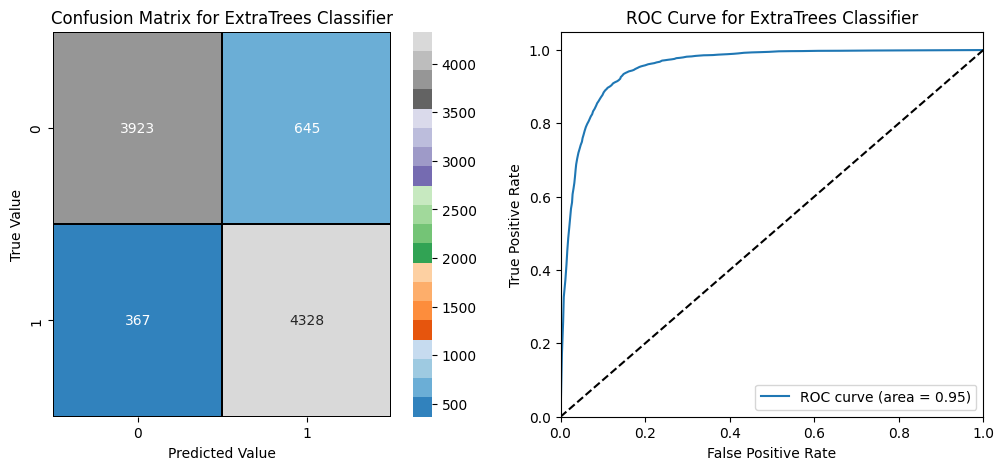

In [105]:

# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "ExtraTrees Classifier": ExtraTreesClassifier()
}

# Initialize dictionaries to store best random states and best accuracies
best_random_states = {}
best_accuracies = {}
mean_accuracies = {}  # Dictionary to store mean accuracies

# Initialize a list to store model performance
model_performances = []

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    maxAccu = 0
    maxRS = 0

    for i in range(1, 200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        clf = classifier
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        acc = accuracy_score(y_test, pred)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i

    best_random_states[classifier_name] = maxRS
    best_accuracies[classifier_name] = maxAccu

    # Perform cross-validation and calculate the mean accuracy
    mean_accuracy = np.mean(cross_val_score(classifier, x, y, cv=5, scoring='accuracy'))
    mean_accuracies[classifier_name] = mean_accuracy

    # Split the data using the best random state
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

    # Train the classifier
    clf = classifier
    clf.fit(x_train, y_train)

    # Predict on the test set
    pred = clf.predict(x_test)

    # Compute performance metrics
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    classification_rep = classification_report(y_test, pred, output_dict=True)
    # Compute additional performance metrics (precision, recall, f1-score, support)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, pred)

    # Create a dictionary for the model performance
    model_performance = {
        "Model": classifier_name,
        "Best Random State": best_random_states[classifier_name],
        "Mean Accuracy": mean_accuracies[classifier_name],
        "Accuracy": accuracy,
        "Precision (Class 0)": precision[0],
        "Precision (Class 1)": precision[1],
        "Recall (Class 0)": recall[0],
        "Recall (Class 1)": recall[1],
        "F1-Score (Class 0)": f1[0],
        "F1-Score (Class 1)": f1[1],
        "Support": support[0] + support[1],
        "Confusion Matrix": [conf_matrix.tolist()],
    }

    # Append the model performance to the list
    model_performances.append(model_performance)

    # Print the model performance
    print(f"\033[1m{classifier_name}\033[0m")
    print("accuracy_score:", accuracy)
    print("classification_report:\n", classification_rep)

    # Plot the confusion matrix
    f, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(conf_matrix, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax[0], cmap="tab20c")
    ax[0].set_xlabel("Predicted Value")
    ax[0].set_ylabel("True Value")
    ax[0].set_title(f'Confusion Matrix for {classifier_name}')

    # Check if the classifier supports predict_proba
    if hasattr(classifier, 'predict_proba'):
        # Compute ROC curve and ROC AUC
        y_pred_prob = classifier.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
        roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
    else:
        # For SVM classifiers, use decision_function to compute ROC curve
        y_pred_prob = classifier.decision_function(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve
    ax[1].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], 'k--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve for {classifier_name}')
    ax[1].legend(loc="lower right")

    plt.show()
    print("="*100)

# Create a DataFrame from the list of model performances
model_performance_df = pd.DataFrame (model_performances)


**The provided code has executed several tasks as outlined below:-**

* Initialize dictionaries to store the best random states, best accuracies, and mean accuracies.

* Loop through each classifier to evaluate its performance:

* ind the best random state that yields the highest accuracy using a for loop.
* Perform cross-validation (5-fold) to calculate the mean accuracy for the current classifier and store it in the mean_accuracies dictionary.
* Split the data into training and testing sets using the best random state.
* Train the classifier on the training data.
* Make predictions on the test data.
* Calculate various performance metrics such as accuracy, precision, recall, F1-score, and support.
* Create a dictionary with all the performance metrics and add it to the model_performances list.
* Display the model performance metrics, including accuracy, classification report, confusion matrix, and ROC curve, for each classifier.

* Create a DataFrame (model_performance_df) to store the collected model performance data.

In [106]:
model_performance_df.sort_values(by="Accuracy", ascending=False)

Model  Best Random State  Mean Accuracy  Accuracy  \
7         ExtraTrees Classifier                 17       0.888540  0.890748   
1      Random Forest Classifier                 76       0.881803  0.889453   
6            XGBoost Classifier                189       0.862393  0.884703   
5  Gradient Boosting Classifier                 17       0.842051  0.853503   
3           K-Nearest Neighbors                 17       0.847254  0.852640   
2      Decision Tree Classifier                 26       0.826008  0.843139   
4          Gaussian Naive Bayes                 76       0.766777  0.778581   
0           Logistic Regression                111       0.749547  0.759473   

   Precision (Class 0)  Precision (Class 1)  Recall (Class 0)  \
7             0.914452             0.870300          0.858800   
1             0.905781             0.874718          0.867102   
6             0.898171             0.872362          0.865724   
5             0.878032             0.832735          0.816331   
3             0.911591             0.809940          0.776489   
2             0.849102             0.837343          0.835380   
4             0.786763             0.771092          0.758824   
0             0.770465             0.749694          0.732505   

   Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  Support  \
7          0.921832            0.885753            0.895325     9263   
1          0.911406            0.886020            0.892685     9263   
6          0.903385            0.881649            0.887603     9263   
5          0.889670            0.846058            0.860262     9263   
3          0.926731            0.838633            0.864408     9263   
2          0.850930            0.842185            0.844082     9263   
4          0.797988            0.772541            0.784310     9263   
0          0.785928            0.751006            0.767384     9263   

                 Confusion Matrix  
7    [[[3923, 645], [367, 4328]]]  
1    [[[3980, 610], [414, 4259]]]  
6    [[[3978, 617], [451, 4217]]]  
5    [[[3729, 839], [518, 4177]]]  
3   [[[3547, 1021], [344, 4351]]]  
2    [[[3877, 764], [689, 3933]]]  
4   [[[3483, 1107], [944, 3729]]]  
0  [[[3360, 1227], [1001, 3675]]]

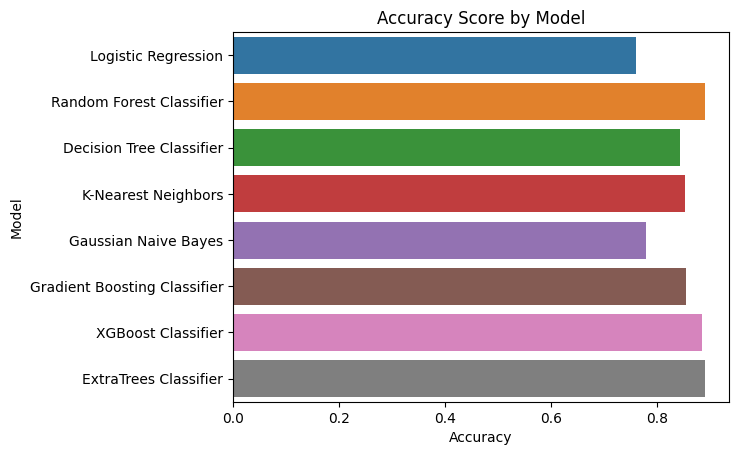

In [107]:
sns.barplot(y='Model', x='Accuracy', data=model_performance_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Score by Model')

# Show the plot
plt.show()

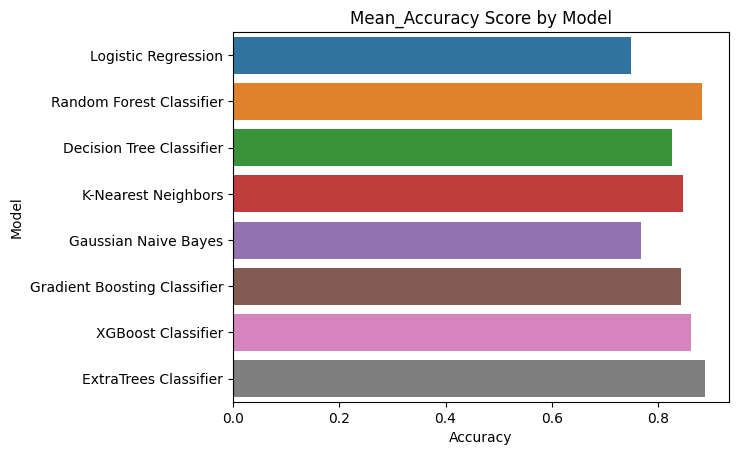

In [113]:
#cross validation mean_accuracy
sns.barplot(y='Model', x='Mean Accuracy', data=model_performance_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Mean_Accuracy Score by Model')

# Show the plot
plt.show()

**From above data and graphical repersentataion:-**

**ExtraTrees Classifier:**
> * Mean Accuracy: 0.888540
> * High Accuracy: 0.890748
> * Balanced Precision and Recall
> * High F1-Score
> * Slightly higher support
> * Confusion Matrix shows relatively balanced results

**Random Forest Classifier:**
> * Mean Accuracy: 0.881803
> * High Accuracy: 0.889453
> * Balanced Precision and Recall
> * High F1-Score
> * Balanced Confusion Matrix

**XGBoost Classifier:**
> * Mean Accuracy: 0.862393
> * High Accuracy: 0.884703
> * Good balance between Precision and Recall
> * High F1-Score
> * Balanced Confusion Matrix

**Gradient Boosting Classifier:**
> * Mean Accuracy: 0.842051
> * High Accuracy: 0.853503
> * Good balance between Precision and Recall
> * High F1-Score
> * Confusion Matrix is not perfectly balanced but relatively good

**K-Nearest Neighbors:**
> * Mean Accuracy: 0.847254
> * High Accuracy: 0.852640
> * High Precision but lower Recall
> * Good F1-Score
> * Support is relatively balanced
> * Slightly imbalanced Confusion Matrix

**Decision Tree Classifier:**
> * Mean Accuracy: 0.826008
> * High Accuracy: 0.843139
> * Good balance between Precision and Recall
> * High F1-Score
> * Relatively balanced Confusion Matrix

**Gaussian Naive Bayes:**
> * Mean Accuracy: 0.766777
> * High Accuracy: 0.778581
> * Balanced Precision and Recall
> * Moderate F1-Score
> * Support is relatively balanced
> * Slightly imbalanced Confusion Matrix

**Logistic Regression:**
> * Mean Accuracy: 0.749547
> * High Accuracy: 0.759473
> * Balanced Precision and Recall
> * Good F1-Score
> * Slightly imbalanced support
> * Slightly imbalanced Confusion Matrix

**Based on these observations, models like ExtraTrees Classifier, Random Forest Classifier, and XGBoost Classifier have demonstrated higher mean accuracy and good balance between precision and recall. These models might be good candidates for hyperparameter tuning to potentially improve their performance further.**

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Hyperparameter tuning using grid search</b>
 </div>

**For ExtraTrees Classifier:-**

In [115]:
# Data splitting for train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=ExtraTreesClassifier(),
                                   param_distributions=param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to find the best parameters
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a classifier with the best parameters
best_et = ExtraTreesClassifier(**best_params)

# Fit the best classifier on the training data
best_et.fit(x_train, y_train)

# Make predictions on the test data
y_pred_et = best_et.predict(x_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred_et)
print("Best Accuracy (ExtraTrees):", best_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report
classification_rep = classification_report(y_test, y_pred_et)
print("Classification Report:")
print(classification_rep)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Accuracy (ExtraTrees): 0.8839468854582748
Confusion Matrix:
[[3950  637]
 [ 438 4238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4587
           1       0.87      0.91      0.89      4676

    accuracy                           0.88      9263
   macro avg       0.88      0.88      0.88      9263
weighted avg       0.88      0.88      0.88      9263



**Mean Accuracy: 0.888540**

**High Accuracy: 0.890748**

**Best Accuracy (ExtraTrees): 0.8839468854582748**

**It seems that the ExtraTrees Classifier achieved a best accuracy of approximately 0.884, which is slightly lower than the high accuracy of 0.890748 observed during the hyperparameter tuning process. The mean accuracy across various parameter combinations was approximately 0.888540.**

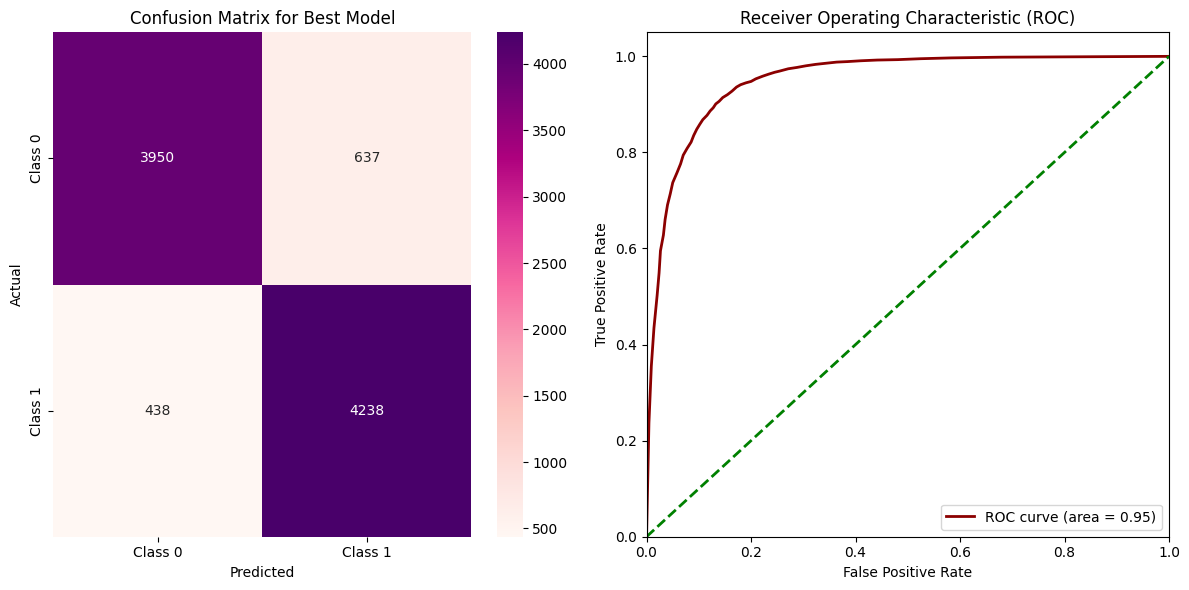

In [116]:
# Get the predicted values of the best model
y_pred = best_et.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the predicted probabilities for the positive class
y_prob = best_et.predict_proba(x_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Define class labels
class_names = ['Class 0', 'Class 1']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix for Best Model')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].legend(loc='lower right')

# Show the combined figure
plt.tight_layout()
plt.show()

An AUC of 0.95 in an ROC curve indicates that the model has strong discriminatory power and is capable of making accurate predictions, but it should be evaluated in the context of the specific problem and its requirements.


**For Random Forest Classifier:-**

In [117]:
# Data splitting for train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to find the best parameters
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(x_test)

# Evaluate the best model
best_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Accuracy (Random Forest):", best_accuracy_rf)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# Calculate the classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(classification_rep_rf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Accuracy (Random Forest): 0.8796286300334665
Confusion Matrix (Random Forest):
[[3931  656]
 [ 459 4217]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4587
           1       0.87      0.90      0.88      4676

    accuracy                           0.88      9263
   macro avg       0.88      0.88      0.88      9263
weighted avg       0.88      0.88      0.88      9263



**Best Accuracy (Random Forest): 0.8796286300334665**

**Mean Accuracy: 0.881803**

**High Accuracy: 0.889453**

**The Random Forest Classifier achieved its best accuracy of approximately 0.8796, which is slightly lower than the high accuracy of 0.889453 observed during the hyperparameter tuning process. The mean accuracy across various parameter combinations was approximately 0.881803.**

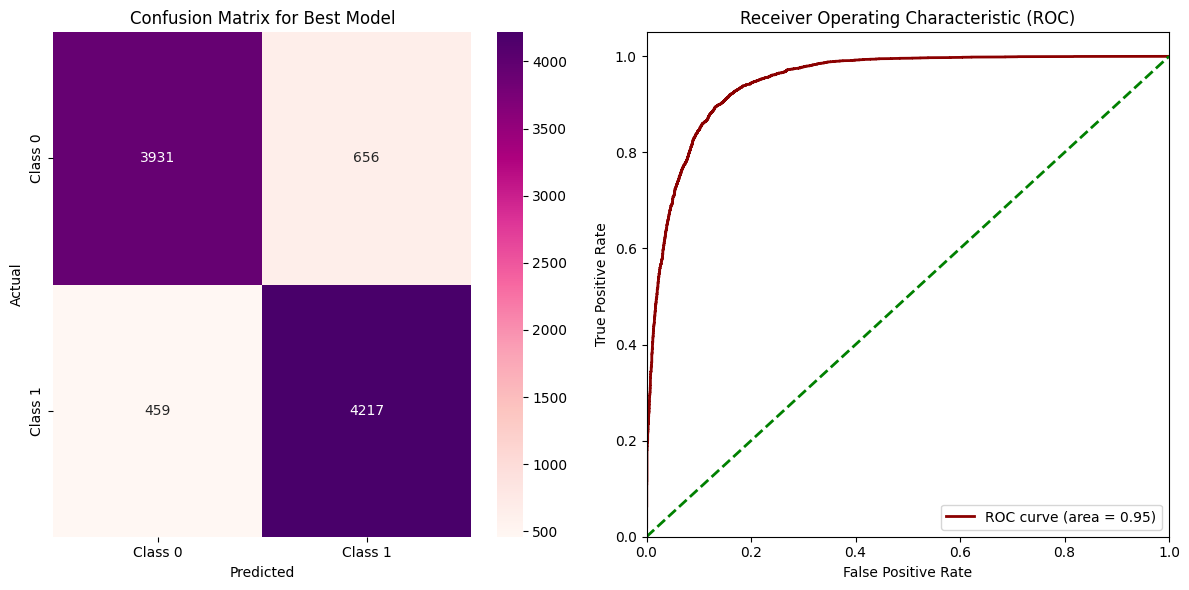

In [118]:
# Get the predicted values of the best model
y_pred = best_rf.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the predicted probabilities for the positive class
y_prob = best_rf.predict_proba(x_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Define class labels
class_names = ['Class 0', 'Class 1']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix for Best Model')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].legend(loc='lower right')

# Show the combined figure
plt.tight_layout()
plt.show()

**For XGBoost Classifier:-**

In [121]:
# Data splitting for train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3]
}

# Create a RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=42),
                                   param_distributions=param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to find the best parameters
random_search_xgb.fit(x_train, y_train)

# Get the best hyperparameters
best_params_xgb = random_search_xgb.best_params_

# Create a classifier with the best parameters
best_xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=42, **best_params_xgb)

# Fit the best classifier on the training data
best_xgb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xgb = best_xgb.predict(x_test)

# Evaluate the best model
best_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Best Accuracy (XGBoost):", best_accuracy_xgb)

# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)

# Calculate the classification report
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report (XGBoost):")
print(classification_rep_xgb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Accuracy (XGBoost): 0.8748785490661772
Confusion Matrix (XGBoost):
[[3934  653]
 [ 506 4170]]
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4587
           1       0.86      0.89      0.88      4676

    accuracy                           0.87      9263
   macro avg       0.88      0.87      0.87      9263
weighted avg       0.88      0.87      0.87      9263




**Best Accuracy (XGBoost): 0.8748785490661772**

**Mean Accuracy: 0.862393**

**High Accuracy: 0.884703**

**The XGBoost Classifier achieved its best accuracy, approximately 87.49%, after hyperparameter tuning. The mean accuracy, averaged across various parameter settings, is approximately 86.24%. The highest accuracy observed during the hyperparameter tuning process reached around 88.47%.**



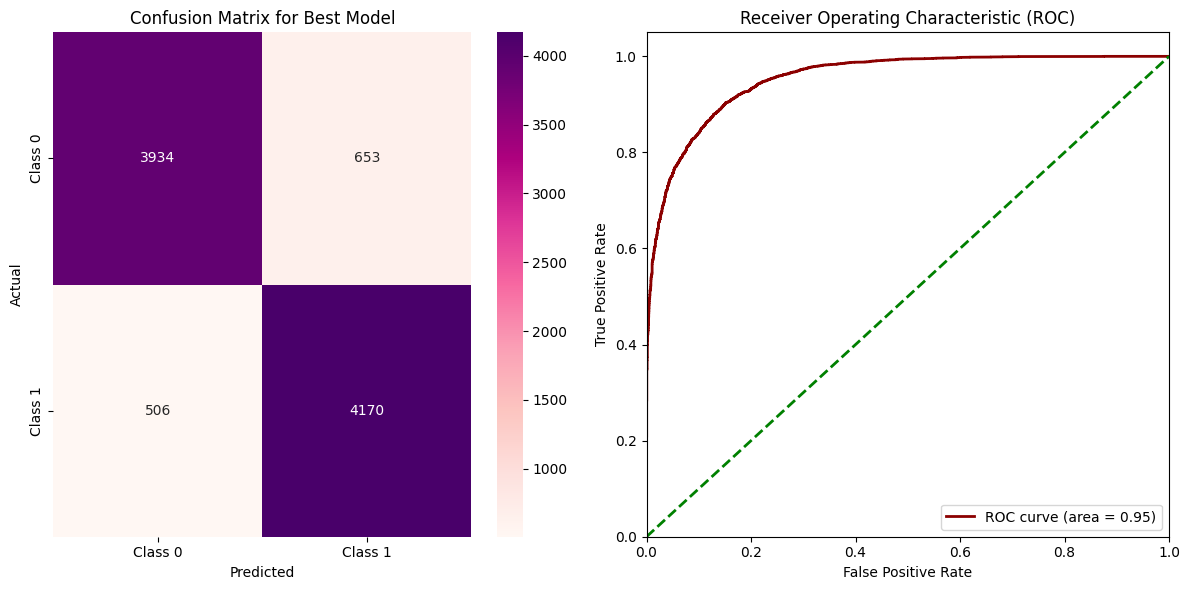

In [123]:
# Get the predicted values of the best model
y_pred = best_xgb.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the predicted probabilities for the positive class
y_prob = best_xgb.predict_proba(x_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Define class labels
class_names = ['Class 0', 'Class 1']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix for Best')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].legend(loc='lower right')

# Show the combined figure
plt.tight_layout()
plt.show()

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Conclusion</b>
 </div>

**Here's a comparison of the data for best performer classifiers in terms of accuracy:-**

**ExtraTrees Classifier:**
> * Mean Accuracy: 0.888540
> * High Accuracy: 0.890748
> * Best Accuracy (ExtraTrees): 0.8839468854582748

**Random Forest Classifier:**
> * Mean Accuracy: 0.881803
> * High Accuracy: 0.889453
> * Best Accuracy (Random Forest): 0.8796286300334665

**XGBoost Classifier:**
> * Mean Accuracy: 0.862393
> * High Accuracy: 0.884703
> * Best Accuracy (XGBoost): 0.8748785490661772

> **Comparing the three classifiers, the ExtraTrees Classifier achieved the highest mean accuracy (0.888540) and the highest high accuracy (0.890748). The best accuracy for ExtraTrees (0.8839468854582748) is also close to the high accuracy, indicating consistent performance across different runs.**

> **The Random Forest Classifier also performed well with a mean accuracy of 0.881803 and a high accuracy of 0.889453. The best accuracy achieved by Random Forest (0.8796286300334665) is only slightly lower than the high accuracy.**

> **The XGBoost Classifier, while still delivering a good performance, had a lower mean accuracy of 0.862393 and a high accuracy of 0.884703. The best accuracy for XGBoost was 0.8748785490661772.**

> **Based on these observations, the ExtraTrees Classifier appears to be the best performer among the three classifiers due to its highest mean and high accuracy, and it maintains consistent performance with its best accuracy. The Random Forest Classifier is a close second, with slightly lower mean accuracy but a high accuracy close to the best accuracy. The XGBoost Classifier, although strong, achieved lower mean and high accuracy compared to the other two classifiers.**

<div style="background-color: #CE5A67; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Saving the best Model(ExtraTrees)</b>
 </div>

In [125]:
# model prediction using Best_Model
x_predict = list(best_et.predict(x_test))
best_model_loan = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(best_model_loan))

       predicted_values  orignal_values
43305                 1               1
24029                 0               0
5604                  0               0
28187                 0               0
11852                 0               0
...                 ...             ...
30421                 1               1
43871                 1               1
7555                  1               1
44422                 1               1
15397                 0               0

[9263 rows x 2 columns]


In [128]:
joblib.dump(best_et,'Extra_Trees_Cenus_Income_file.obj')

['Extra_Trees_Cenus_Income_file.obj']

In [129]:
loaded_et_model=joblib.load('Extra_Trees_Cenus_Income_file.obj')
loaded_et_model.predict(x_test)

array([1, 0, 0, ..., 1, 1, 0])

### Checking predicted and original values:-

In [130]:
a = np.array(y_test)
predicted = np.array(best_et.predict(x_test))

Census_Inome_Status_Prediction = pd.DataFrame({'Original': a, 'Predicted': predicted})
print(Census_Inome_Status_Prediction)
# Calculate accuracy
accuracy = (Census_Inome_Status_Prediction['Original'] == Census_Inome_Status_Prediction['Predicted']).mean() * 100

print(f"Accuracy: {accuracy:.2f}%")

      Original  Predicted
0            1          1
1            0          0
2            0          0
3            0          0
4            0          0
...        ...        ...
9258         1          1
9259         1          1
9260         1          1
9261         1          1
9262         0          0

[9263 rows x 2 columns]
Accuracy: 88.39%


**Explanation:-**

* The provided dataset contains valuable information regarding the income of populations in various countries. Upon conducting our analysis, I observed that a significant proportion of the population earns an annual income of less than or equal to 50,000, with only a minority earning more than 50,000. This insight sheds light on the diverse standards of living across these populations.

* Furthermore, our analysis revealed disparities in income distribution within these diverse populations, indicating an absence of equal pay. Notably, I found that a considerable number of female professionals earn less than their male counterparts, even when possessing similar levels of education and professional backgrounds. Additionally, the gender ratio in the dataset is skewed, with a relatively low representation of females.

* Moreover, our analysis highlighted a significant predominance of individuals of the white racial group compared to other racial groups. This observation hints at potential social biases favoring a particular race within the dataset.

* To address these insights and gain a deeper understanding of the data, I developed eight different models. Among these models, the ExtraTrees Classifier emerged as the most accurate, achieving an impressive accuracy rate of  0.88%. Furthermore, this model exhibited the lowest Type 1 error (false positive rate) in comparison to the other models. As a result, I have chosen to retain the  ExtraTrees Classifier as our preferred model for future use.